# Wnioski

## Bagging

Badając wpływ liczby klasyfikatorów. Ze wzrostem tego parametru wzrasta f1-score, jednak optymalna wartość jest w środku zakresu badanych wartości. Zbiór GLASS się nie zmienia, bo ten zbiór jest specyficzny.

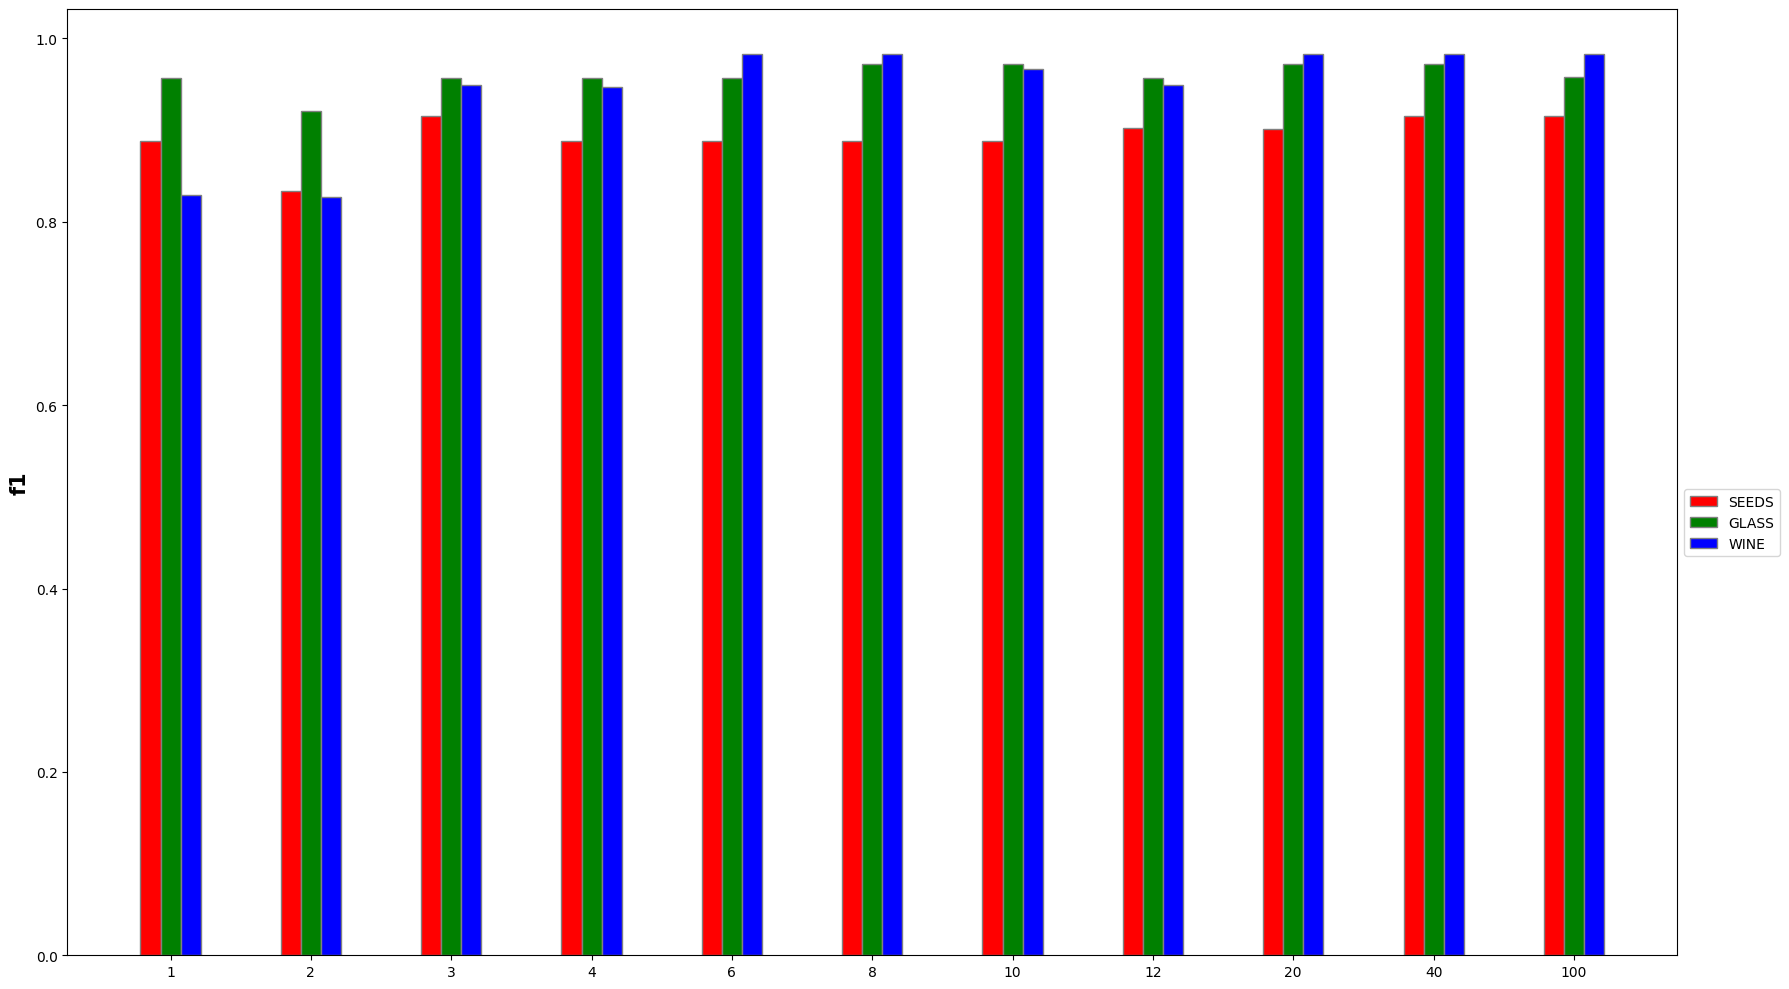

Max smaples też ogólnie polepsza wyniki, ale dla co datasetu możemy wyznaczyć optymalną wartość, jednak możliwie to spowodowane wadanie wartości podanej jako %.

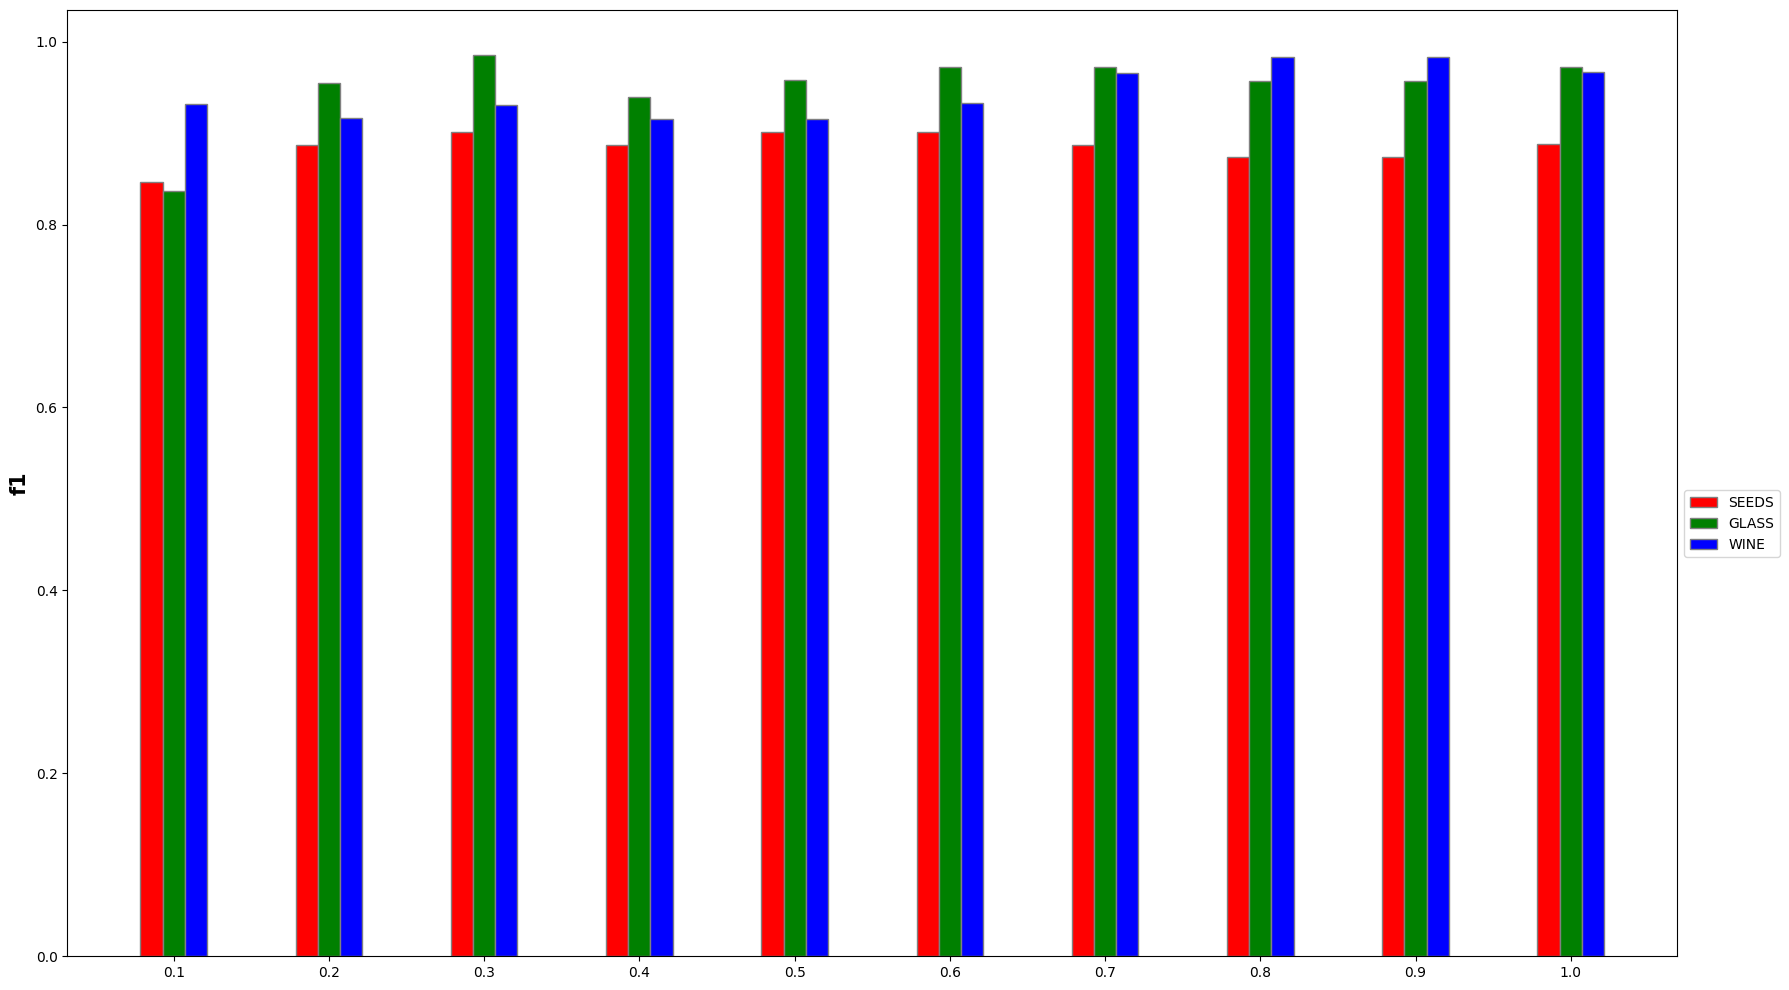

Liczba atrybutów daje gorsze wyniki dla małych wartości, ale optymalne wartości są w środku zakresu.

Zmiany zpowodowane różnymy wartościami bootstrap nie są znaczące.

### AdaBoost

W przypadku liczby klasyfikatorów tutaj też możemy zobaczyć, że wartości w środku, 2,4,6, dają same optymalne wyniki dla WINE. GLASS robi swoje rzeczy, a SEEDS się nie udało polepszyć.

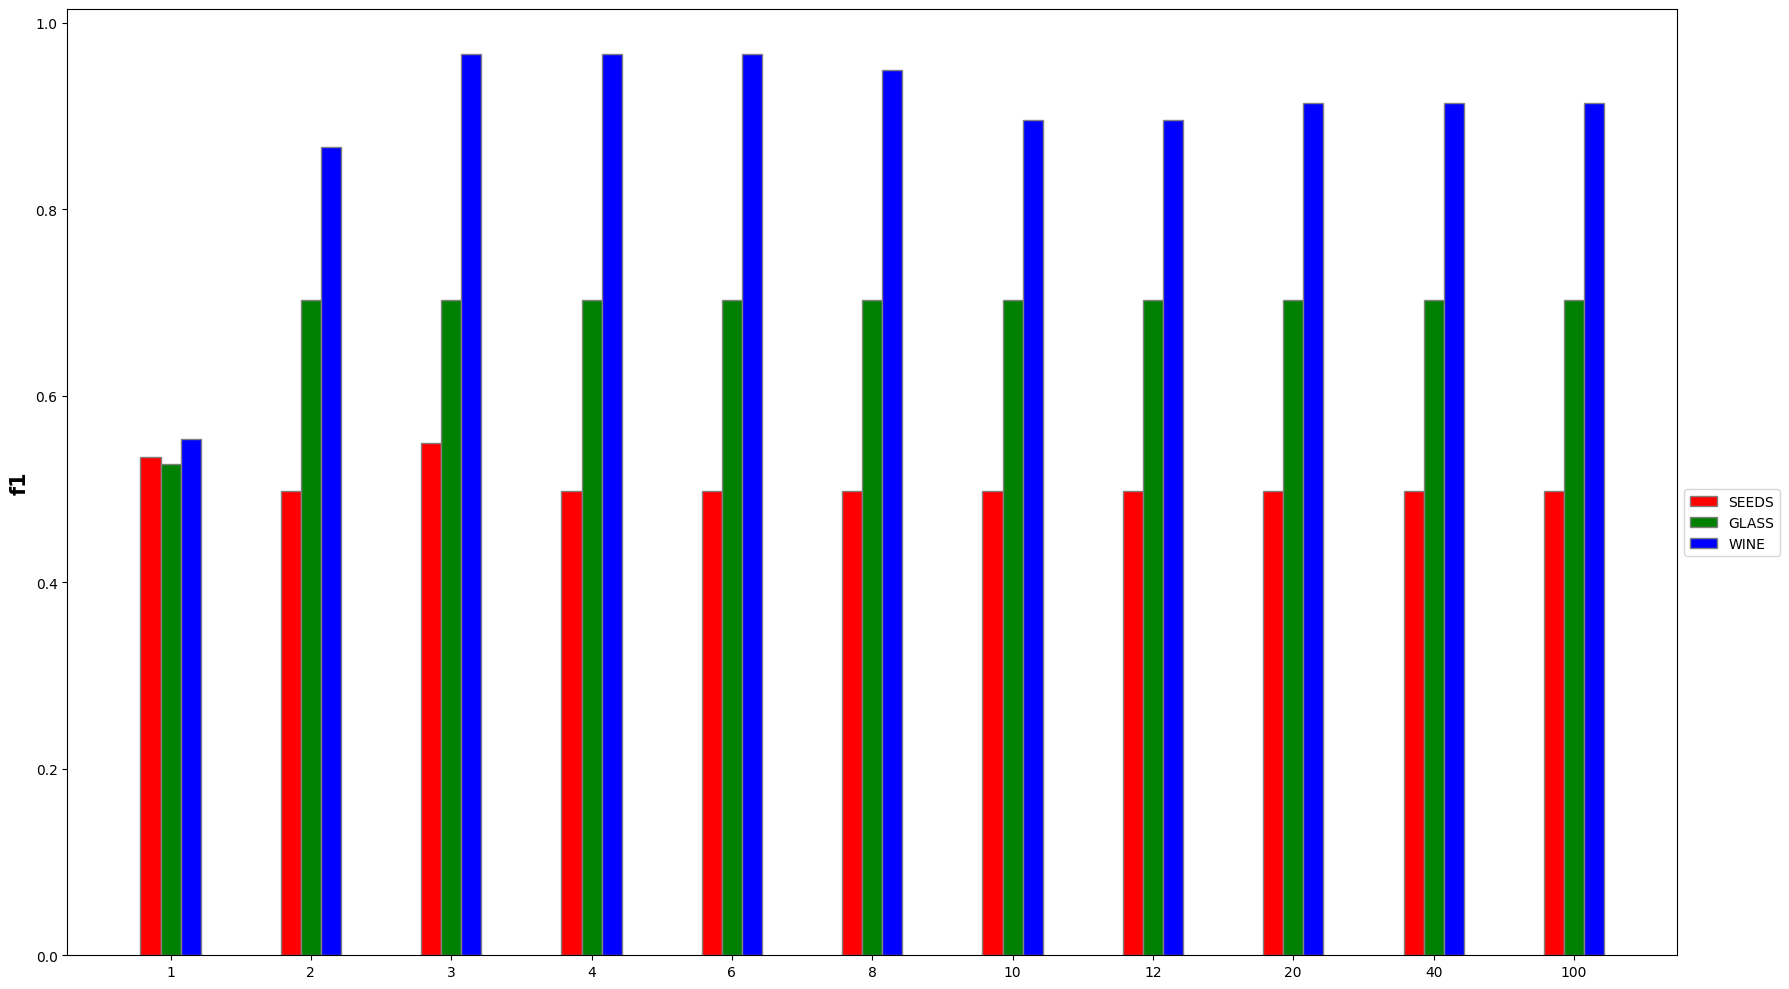

Badając współczynnik uczeniadla zbiorów GLASS i WINE nic dziwnego się nie zdażyło, niektóre wartości lepsze, niektóre gorsze, jednak SEEDS zachowywał się dziwno

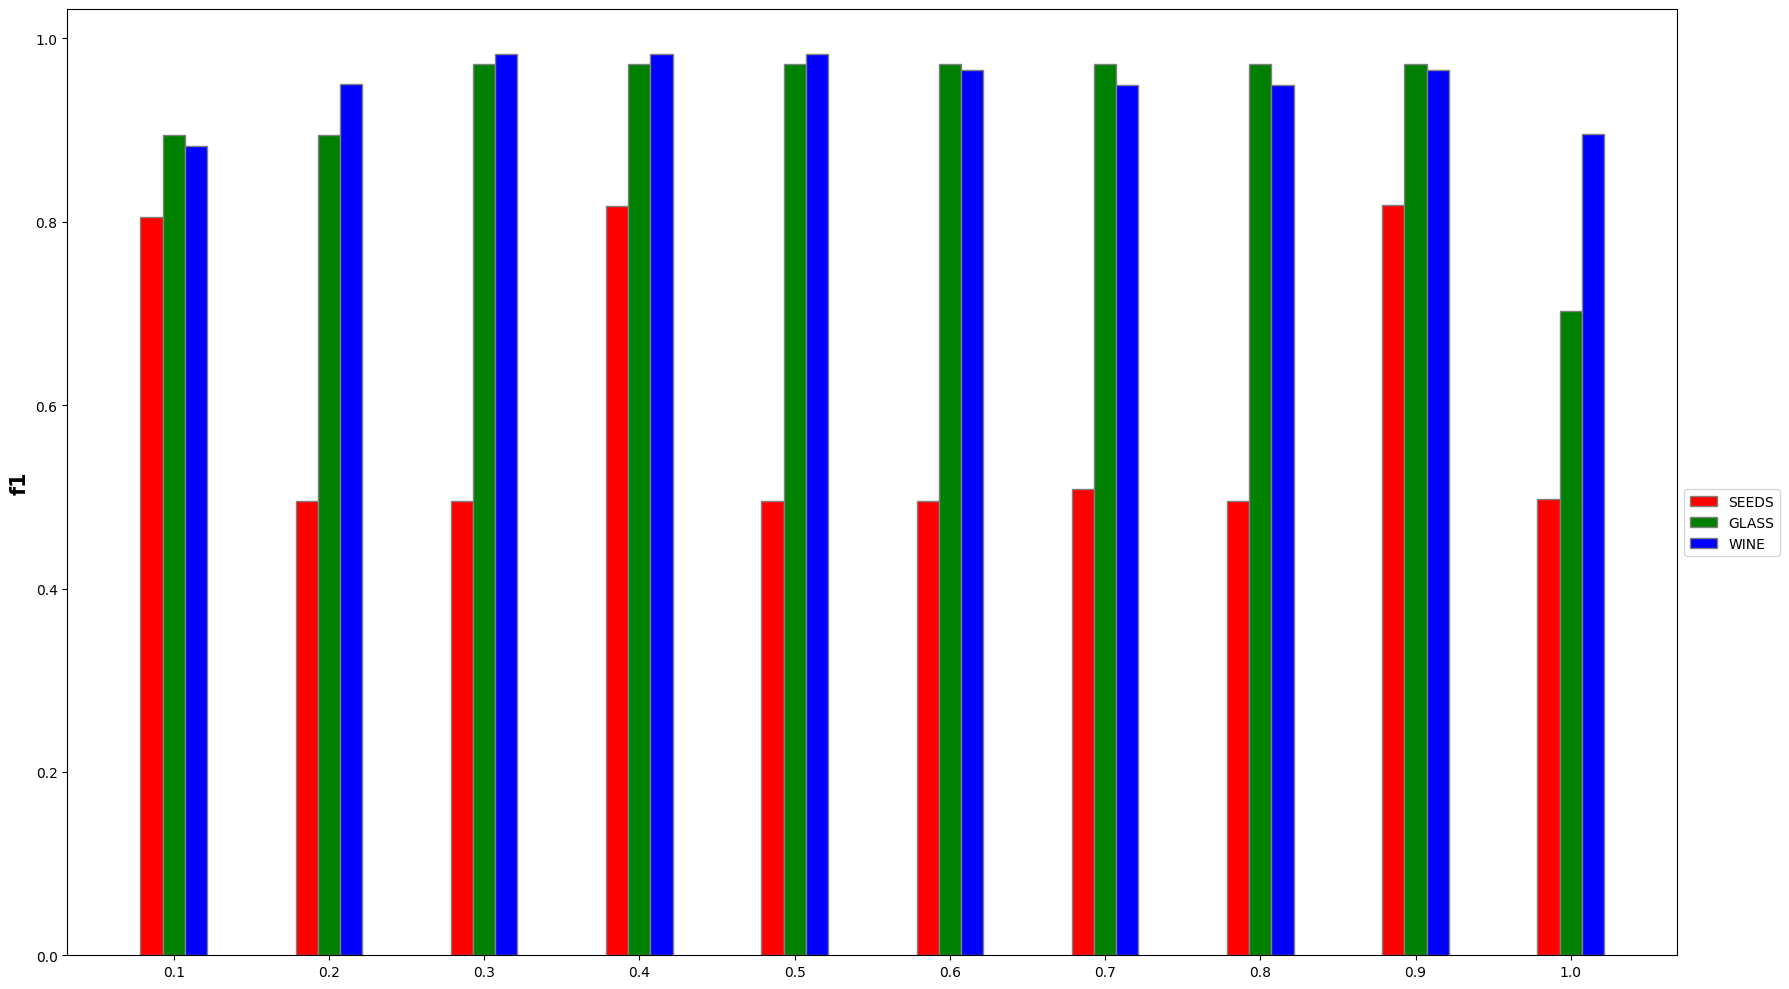

Aby zrozumieć, co się dizieje, popatrzyłem na wizualizacje

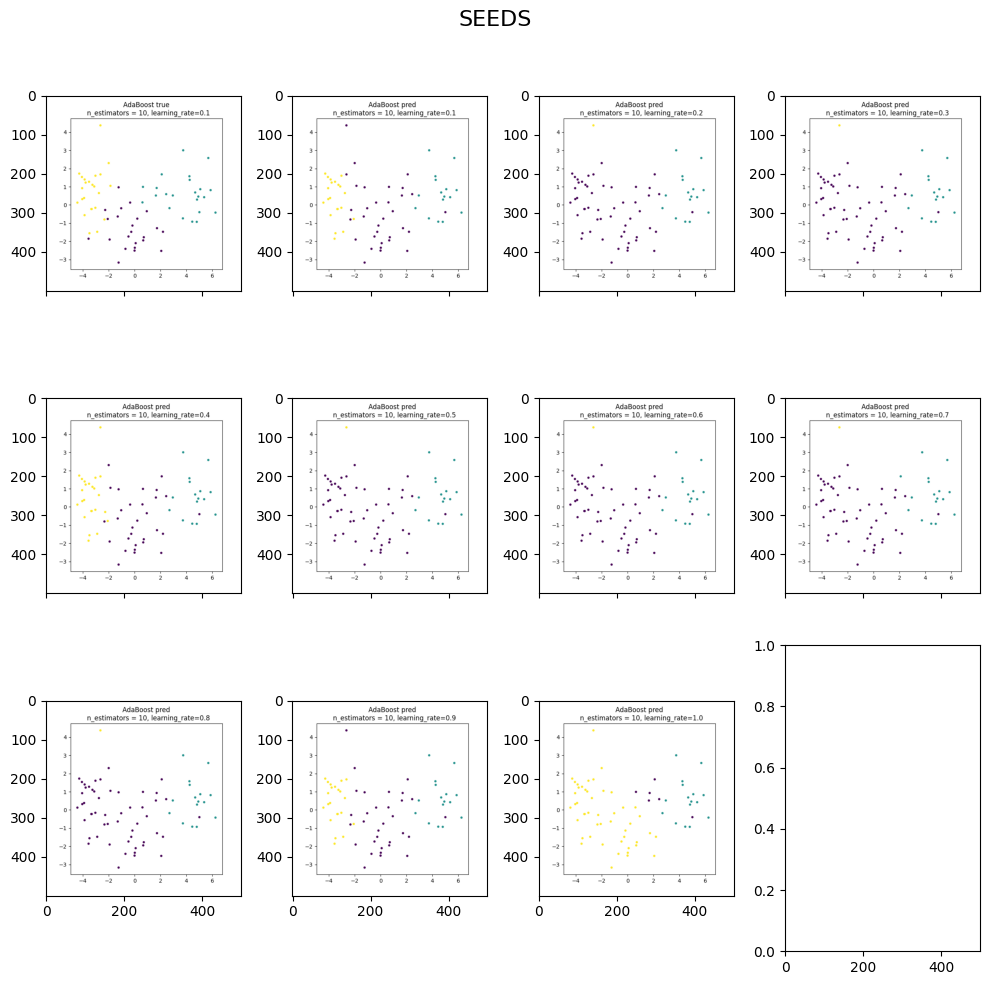

Widać, że dla wartości oprócz 0.1, 0.4 i 0.9 adaboost pracuje bardzo średnio i nie ma nawet wszystkich trzech klas.

## Random forest

Nic ciekawego z liczbą drzew, można znaleźć optymalną wartość dla co zbioru

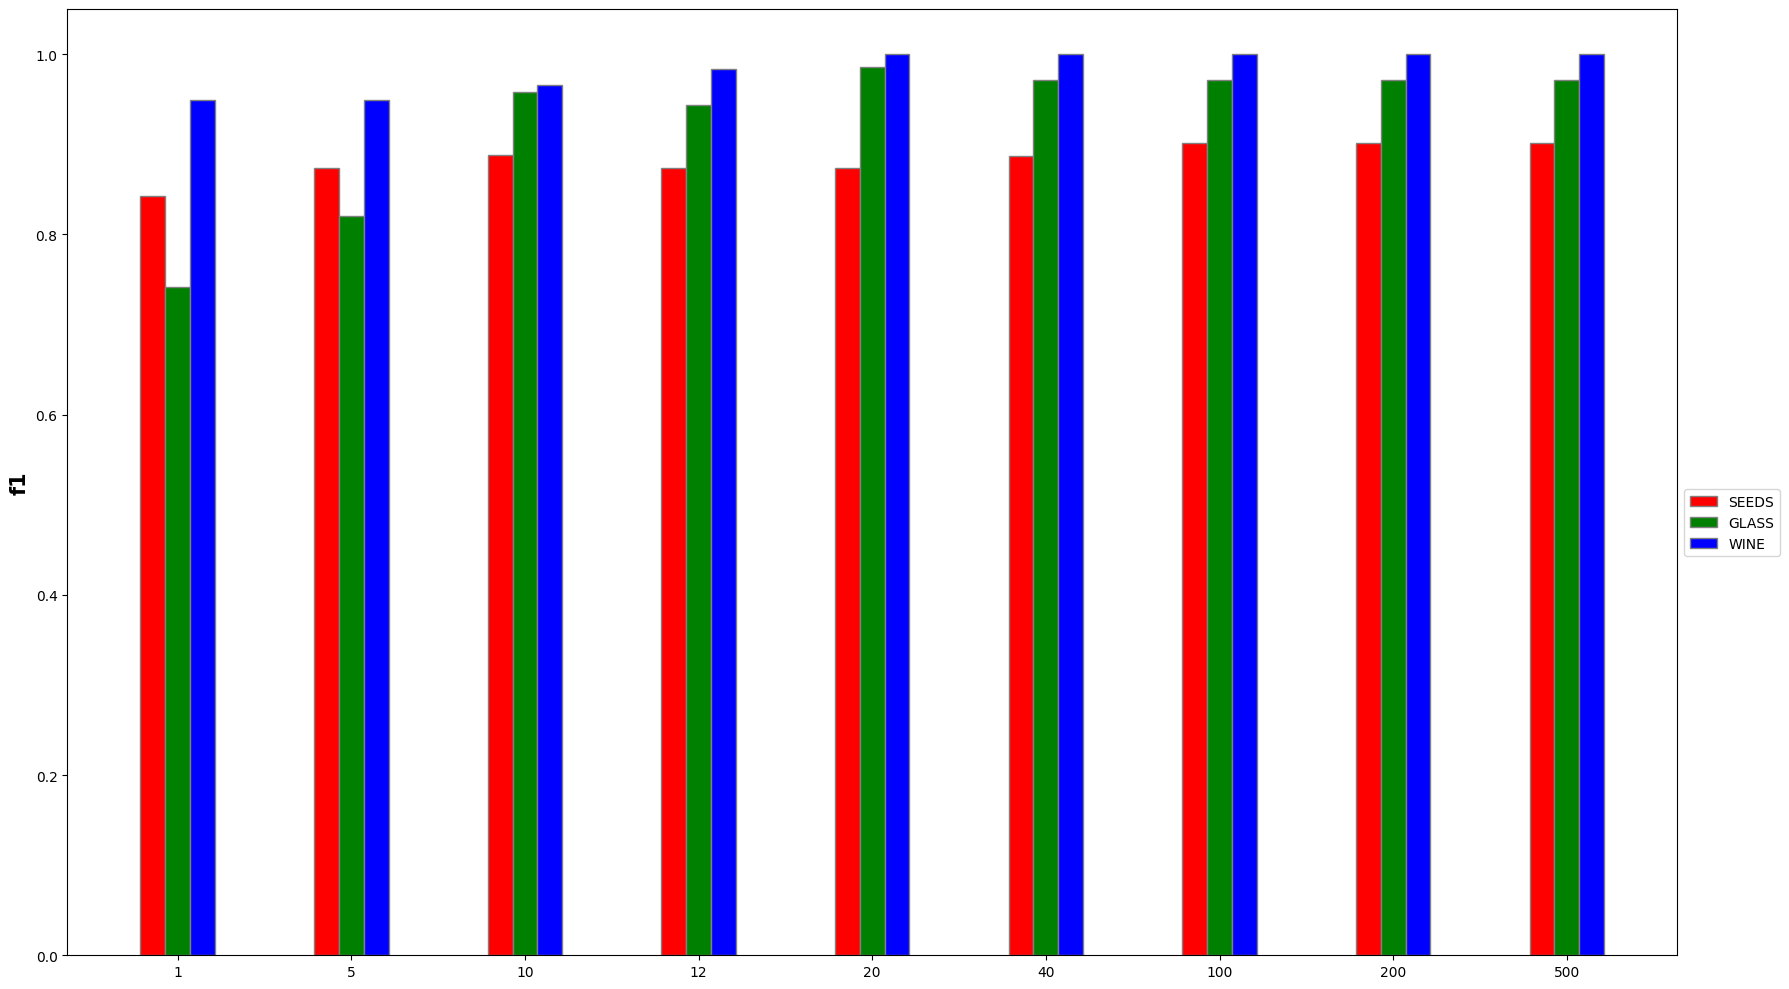

Duża wartość liczby samplów pogorszyła rezultat dla GLASS, ale pozostałe zbiory mało odczuły zmiany.

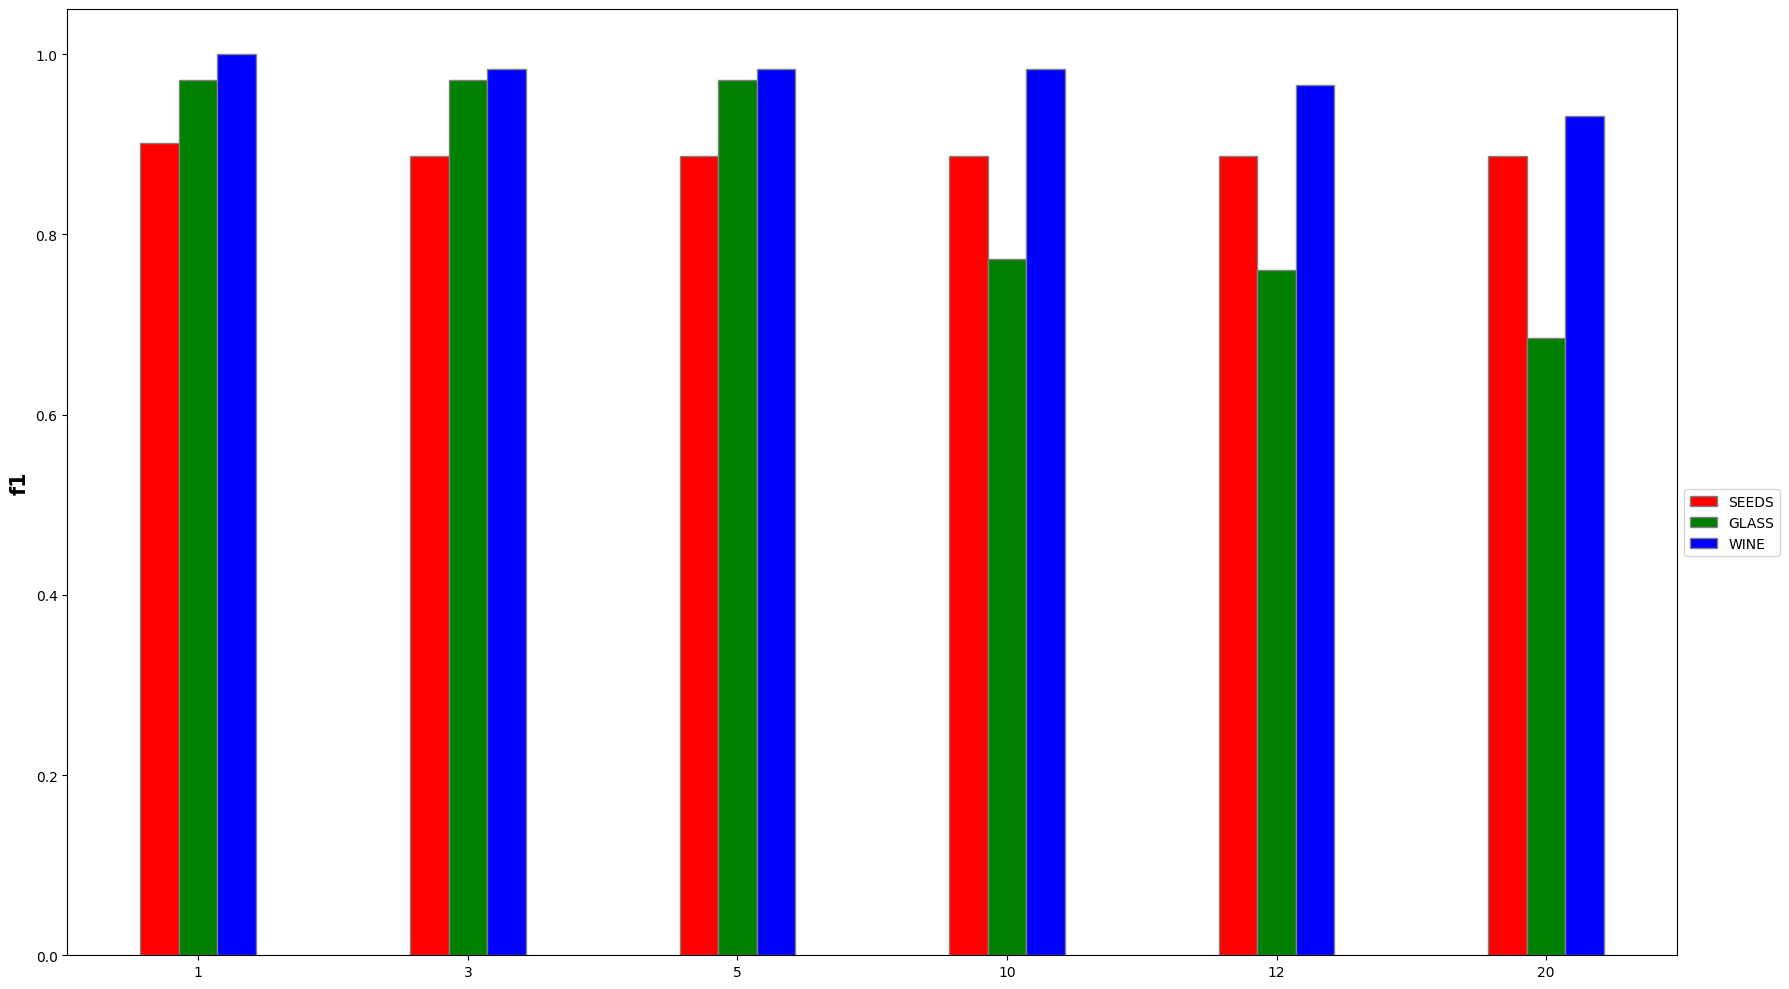

Grając z liczbą cech można polepszyć wynik, ale rezultat jest +- taki sam dla wszystkich zbiorów

Głębokość też nie dała duże zmiany

## Porównanie z klasyfikatorem bazowym 

Sprawdzimy wartości f1 dla parametrów domyślnych tech klasyfikatorów

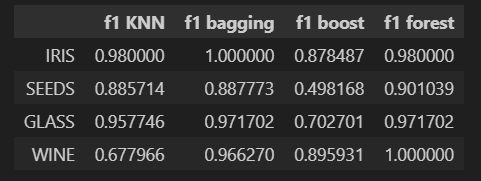

IRIS, SEEDS i GLASS powodują sobie podobnie: wszystkie metody ensemble oprocz boosting dają lepsze wyniki.

Ale najciekawsze są wyniki dla WINE, gdzie ensemble dają znacznie lepsze wyniki. Zobaczmy jak wygląda ten dataset.

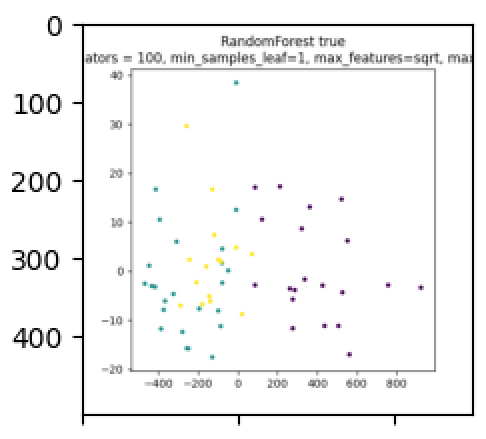

I odrazu widać dlaczego, bo dane tutaj są zmieszane (dla 2 klas). A metody ensemble, ogolna idea ktorych to wykorzystanie kilka klasyfikatorow aby jedne klasyfikatory negowały błędy innych klasyfikatorow, jest w stanie złapać takie struktury. w odrożnieniu od klasyfikatorow bazowych

Chas pracy alg

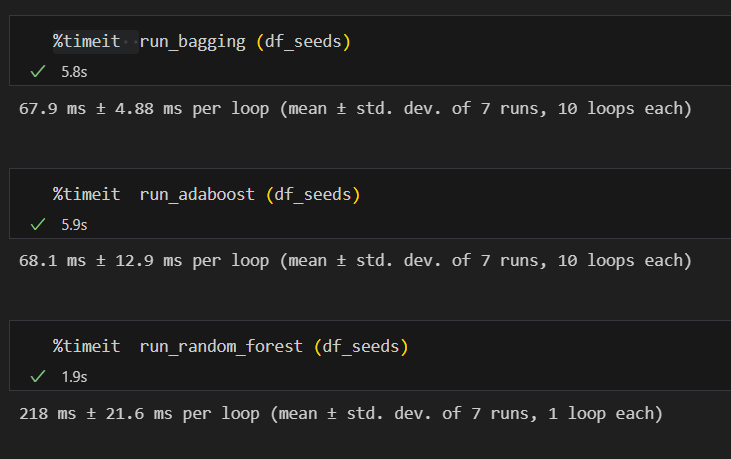

# Część techniczna

In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy
import pandas as pd 
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.io import arff

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'pepal length', 'pepal width'])
df_iris = pd.concat([df_iris, pd.DataFrame(iris.target, columns=['name'])], axis=1 )

In [3]:
import requests

data_seeds_raw = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt')
data_seeds = ''
for data in (data_seeds_raw.iter_content()):
    data_seeds = data_seeds + data.decode("utf-8") 

data_seeds_split = data_seeds.split('\n')
data_seeds = []

for x in data_seeds_split:
    if x != '':
        data_seeds.append([float(xx) for xx in x.split('\t') if xx != ''])

data_seeds = numpy.array(data_seeds)

df_seeds = pd.DataFrame(data_seeds)

df_seeds = df_seeds.astype({7: int})
df_seeds = df_seeds.rename(columns = {7: 'name'})
df_seeds.columns = df_seeds.columns.astype(str)

In [4]:
import requests

data_glass_raw = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')

data_glass = ''
for data in (data_glass_raw.iter_content()):
    data_glass = data_glass + data.decode("utf-8") 
data_glass_split = data_glass.split('\n')
data_glass = []
for x in data_glass_split:
    if x != '':
        data_glass.append([float(xx) for xx in x.split(',')])
    

data_glass = numpy.array(data_glass)

df_glass = pd.DataFrame(data_glass)

df_glass = df_glass.astype({10: int})
df_glass = df_glass.rename(columns = {10: 'name'})
df_glass.columns = df_glass.columns.astype(str)

In [5]:
dict_attr_wine = {
    0 : 'Alcohol',
    1 : 'Malic acid',
    2 : 'Ash',
    3 : 'Alcalinity of ash' ,
    4 : 'Magnesium',
    5 : 'Total phenols',
    6 : 'Flavanoids',
    7 : 'Nonflavanoid phenols',
    8 : 'Proanthocyanins',
    9 : 'Color intensity',
    10: 'Hue',
    11: 'OD280/OD315 of diluted wines',
    12: 'Proline'
}

wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data, columns=dict_attr_wine.values())
df_wine = pd.concat([df_wine, pd.DataFrame(wine.target, columns=['name'])], axis=1 )

In [6]:
import math
import numpy as np
def plotStatistics(df, metrics, col_names, dataset_names, colours):
    size_height = math.ceil(len(metrics)/2)
    size_width = math.ceil((len(metrics))/size_height)
    fig, axes = plt.subplots(size_height, size_width, sharex=True, sharey=False, figsize=(18, 10))
    
    for i in range(len(metrics)):
        col_id = i % size_width
        row_id = i // size_width


        y = [[exp_data[metrics[i]] for exp_data in ds_data ] for ds_data in df]

        barWidth =1 / (len(y) + 4)

        brs = []
        brs.append(np.arange(len(y[0])))

        for j in range(1, len(y)):
            brs.append([x + barWidth for x in brs[j-1]])

        for j in range(len(y)):
            if len(metrics) == 1:
                axes.bar(brs[j], y[j], color = colours[j], width = barWidth,
                    edgecolor ='grey', label =dataset_names[j])
            elif size_height > 1:
                axes[row_id][col_id].bar(brs[j], y[j], color = colours[j], width = barWidth,
                    edgecolor ='grey', label =dataset_names[j])
            else:
                axes[col_id].bar(brs[j], y[j], color = colours[j], width = barWidth,
                    edgecolor ='grey', label =dataset_names[j])

        # axes[row_id][col_id].set_xlabel('Value', fontweight ='bold', fontsize = 15)
        if len(metrics) == 1:
            axes.set_ylabel(metrics[i], fontweight ='bold', fontsize = 15)
            axes.set_xticks([r + barWidth for r in range(len(y[0]))],
                    col_names)

            axes.legend(bbox_to_anchor=(1, 0.5), fancybox=True)
        elif size_height > 1:
            axes[row_id][col_id].set_ylabel(metrics[i], fontweight ='bold', fontsize = 15)
            axes[row_id][col_id].set_xticks([r + barWidth for r in range(len(y[0]))],
                    col_names)

            axes[row_id][col_id].legend(bbox_to_anchor=(1, 0.5), fancybox=True)
        else:
            axes[col_id].set_ylabel(metrics[i], fontweight ='bold', fontsize = 15)
            axes[col_id].set_xticks([r + barWidth for r in range(len(y[0]))],
                    col_names)

            axes[col_id].legend(bbox_to_anchor=(1, 0.5), fancybox=True)


    plt.tight_layout()

# plotStatistics(results_list_criterion, ['silhouette_score', 'davies_bouldin_score', 'rand_score', 'purity_score'], ['a', 'b'], ['IRIS', 'SEEDS', 'GLASS', 'PCB'], ['r', 'g', 'b', 'c'])


In [7]:
from io import BytesIO

def combineFigsInOnePlot(dict_list, plot_name = ''):
    size_width = min(4, len(dict_list) + 1)
    size_height = math.ceil((len(dict_list) + 1)/size_width)
    fig, axes = plt.subplots( size_height, size_width, sharex=True, sharey=False, figsize=(10, 10))
    
    buffer_tru = BytesIO()
    dict_list[0]['true_fig'].savefig(buffer_tru, format='png')
    buffer_tru.seek(0)
    image_true_data = plt.imread(buffer_tru)

    if size_height > 1:
        axes[0][0].imshow(image_true_data)
    else:
        axes[0].imshow(image_true_data)
    
    for i in range(len(dict_list)):
        col_id = (i + 1) % size_width
        row_id = (i + 1) // size_width

        buffer = BytesIO()
        dict_list[i]['pred_fig'].savefig(buffer, format='png')
        buffer.seek(0)
        image_data = plt.imread(buffer)

        if size_height > 1:
            axes[row_id][col_id].imshow(image_data)
        else:
            axes[col_id].imshow(image_data)
    
    fig.suptitle(plot_name, fontsize=16)
    plt.tight_layout()


## Klasyfikator bazowy

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skmet

def RunKNN (df, n_neighbors = 5, weights = 'uniform', metric = 'minkowski', cv = 3, isStratified = False, print_metrics = True):
    neigh = KNeighborsClassifier(n_neighbors = n_neighbors, metric = metric, weights = weights)

    df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)

    neigh.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    y_true = df_test.iloc[:, -1].tolist()
    y_pred = neigh.predict(df_test.iloc[:, :-1])

    strat_k_fold = None
    if isStratified:
        strat_k_fold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    else:
        strat_k_fold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    cross_val = cross_val_score(neigh, df.iloc[:, :-1], df.iloc[:, -1], cv=strat_k_fold)
    cross_val = cross_val.mean()
    
    if print_metrics:
        print(skmet.classification_report(y_true, y_pred))
        print('Cross val: ', cross_val)
    
    return {'f1':skmet.f1_score(y_true, y_pred, average='micro'), 'cross-val': cross_val}

RunKNN(df_iris, cv = 3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Cross val:  0.9666666666666667


{'f1': 0.98, 'cross-val': 0.9666666666666667}

In [9]:
score_metric = 'f1'
results_df = pd.DataFrame([
[RunKNN (df_iris, print_metrics = False)[score_metric], RunKNN (df_iris, print_metrics = False)['cross-val']],
[RunKNN (df_seeds, print_metrics = False)[score_metric], RunKNN (df_seeds, print_metrics = False)['cross-val']],
[RunKNN (df_glass, print_metrics = False)[score_metric], RunKNN (df_glass, print_metrics = False)['cross-val']],
[RunKNN (df_wine, print_metrics = False)[score_metric], RunKNN (df_wine, print_metrics = False)['cross-val']]
], index=['IRIS', 'SEEDS', 'GLASS', 'WINE'], columns = ['f1', 'cross_val'])

results_df

,f1,cross_val
IRIS,0.980000,0.966667
SEEDS,0.885714,0.904762
GLASS,0.957746,0.976721
WINE,0.677966,0.640207


## Bagging

1.0


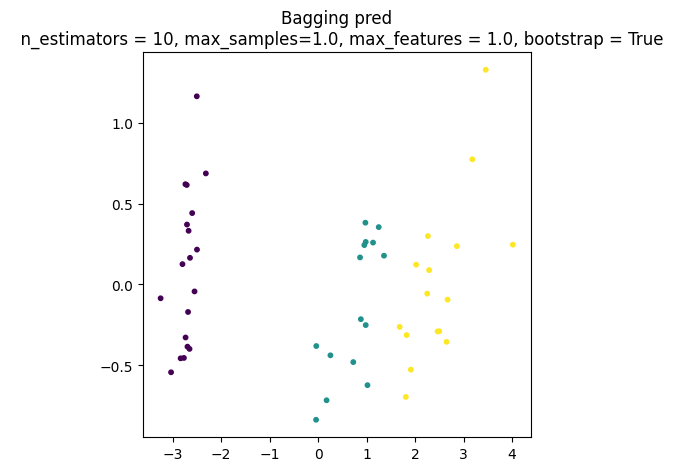

In [10]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import BaggingClassifier

def run_bagging(df, n_estimators = 10, max_samples = 1.0, max_features = 1.0, bootstrap = True):
    df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)    
    clf = BaggingClassifier(n_estimators = n_estimators, max_samples = max_samples, max_features = max_features, bootstrap = bootstrap, random_state=42)
    clf = Pipeline([('imputate', SimpleImputer( strategy='mean')),
                    ('standardization', StandardScaler()),
                    ('clf', clf),])
    
    clf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    y_true = df_test.iloc[:, -1].tolist()
    y_pred = clf.predict(df_test.iloc[:, :-1])

    X_reduced = PCA(n_components=2).fit_transform(df_test)

    pred_fig = plt.figure(1, figsize=(5, 5))
    ax1 = pred_fig.add_subplot()
    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_pred)
    ax1.set_title(f"Bagging pred\n  n_estimators = {n_estimators}, max_samples={max_samples}, max_features = {max_features}, bootstrap = {bootstrap}")
    plt.close()

    true_fig = plt.figure(2, figsize=(5, 5))
    ax2 = true_fig.add_subplot()
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_true)
    ax2.set_title(f"Bagging true\n  n_estimators = {n_estimators}, max_samples={max_samples}, max_features = {max_features}, bootstrap = {bootstrap}")
    plt.close()

    f1 = f1_score(y_true, y_pred, average='weighted')
    
    return {'f1':f1, 
              'pred_fig': pred_fig, 'true_fig': true_fig,}

test_run = run_bagging(df_iris)
print(test_run['f1'])
test_run['pred_fig']

In [11]:
metrics_list = ['f1']
dataset_list = ['SEEDS', 'GLASS', 'WINE']
colour_list = ['r', 'g', 'b']

### Bagging - liczba classfikatorow

In [12]:

study_vals = [1, 2, 3, 4, 6, 8, 10, 12, 20, 40, 100]
results_list = [
[run_bagging (df_seeds, n_estimators = c) for c in study_vals],
[run_bagging (df_glass, n_estimators = c) for c in study_vals],
[run_bagging (df_wine, n_estimators = c) for c in study_vals],
]


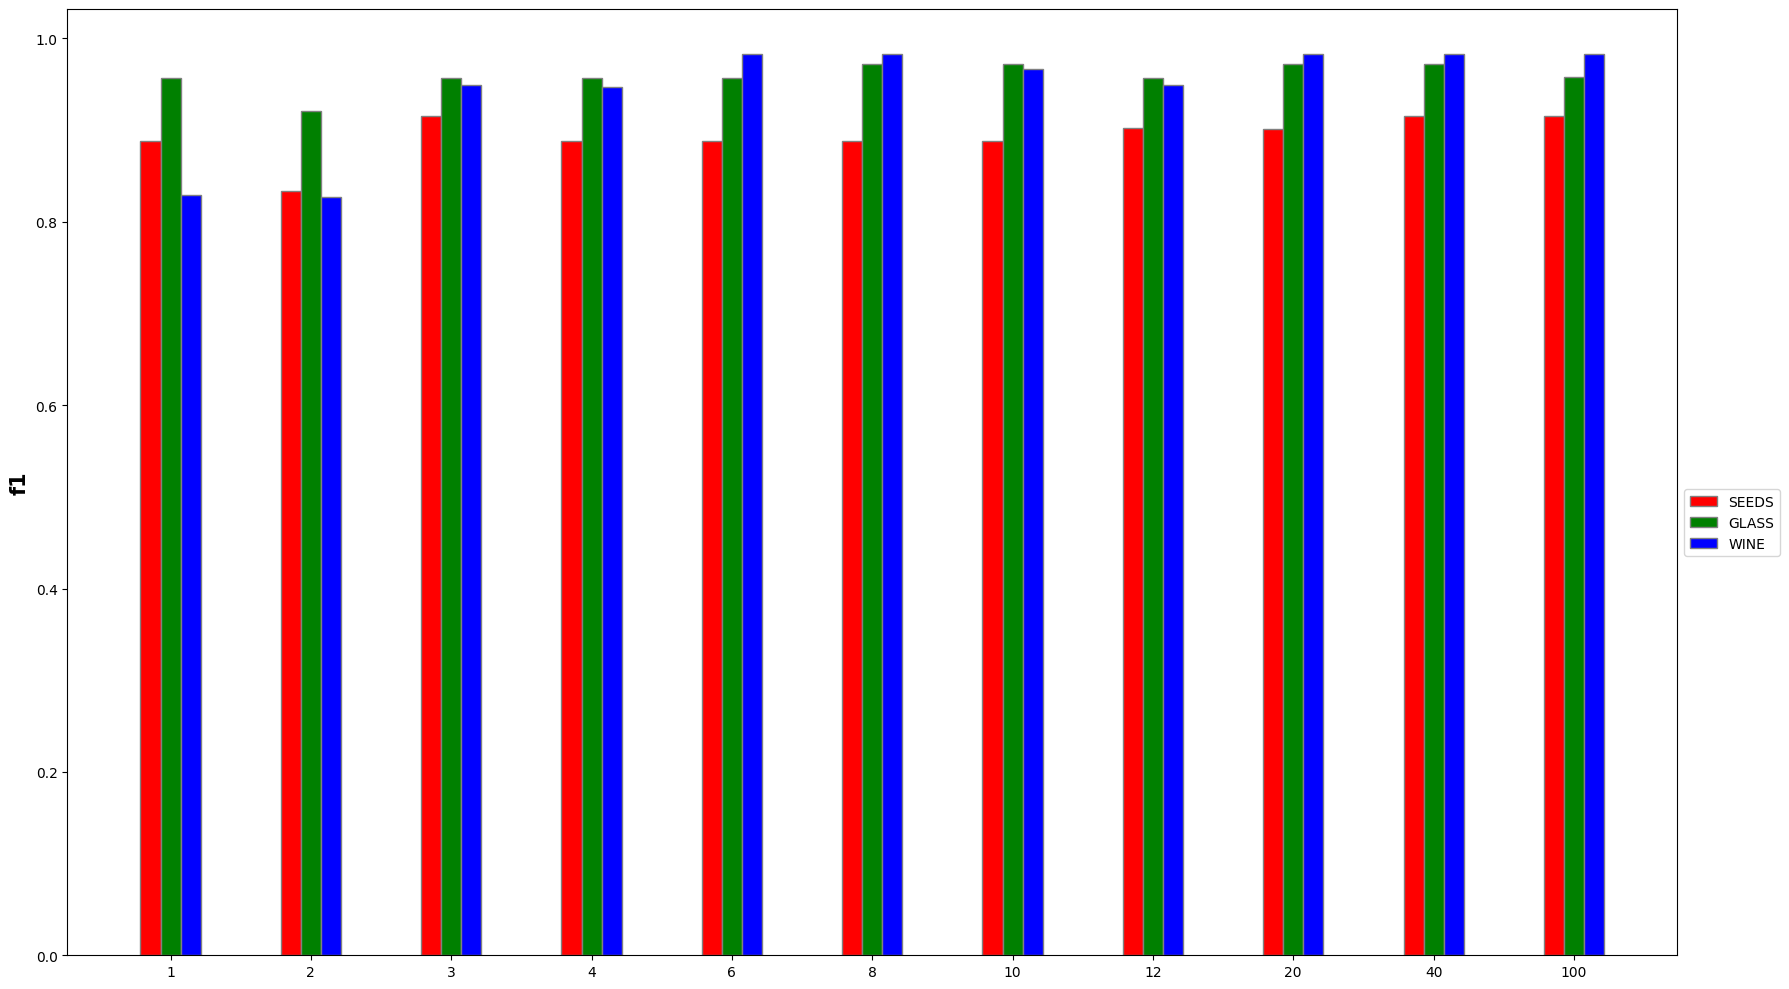

In [13]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

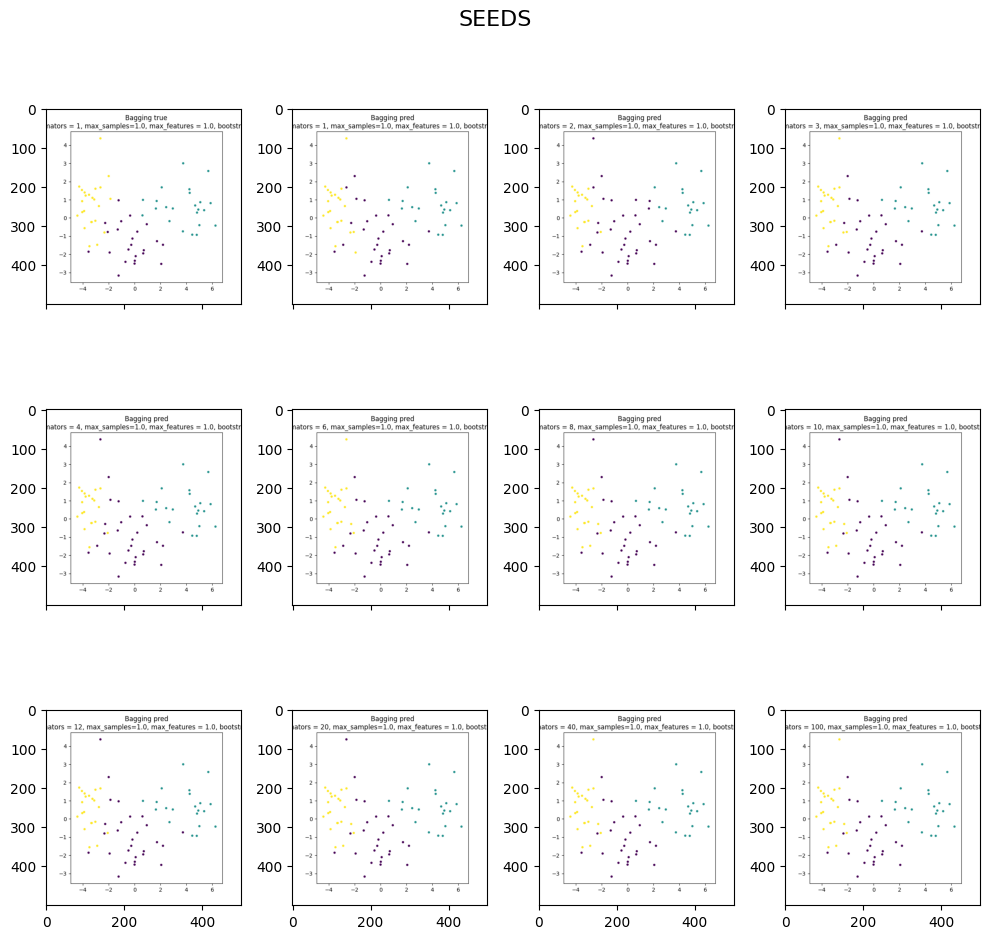

In [14]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

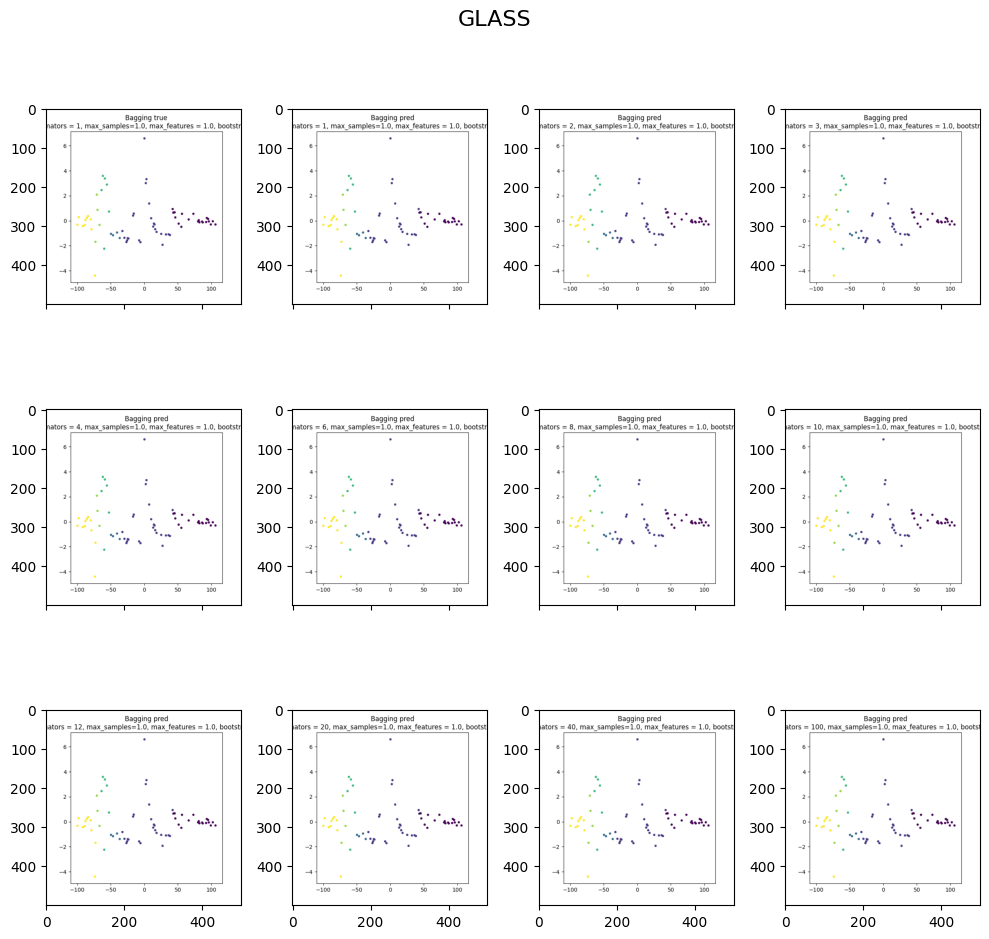

In [15]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

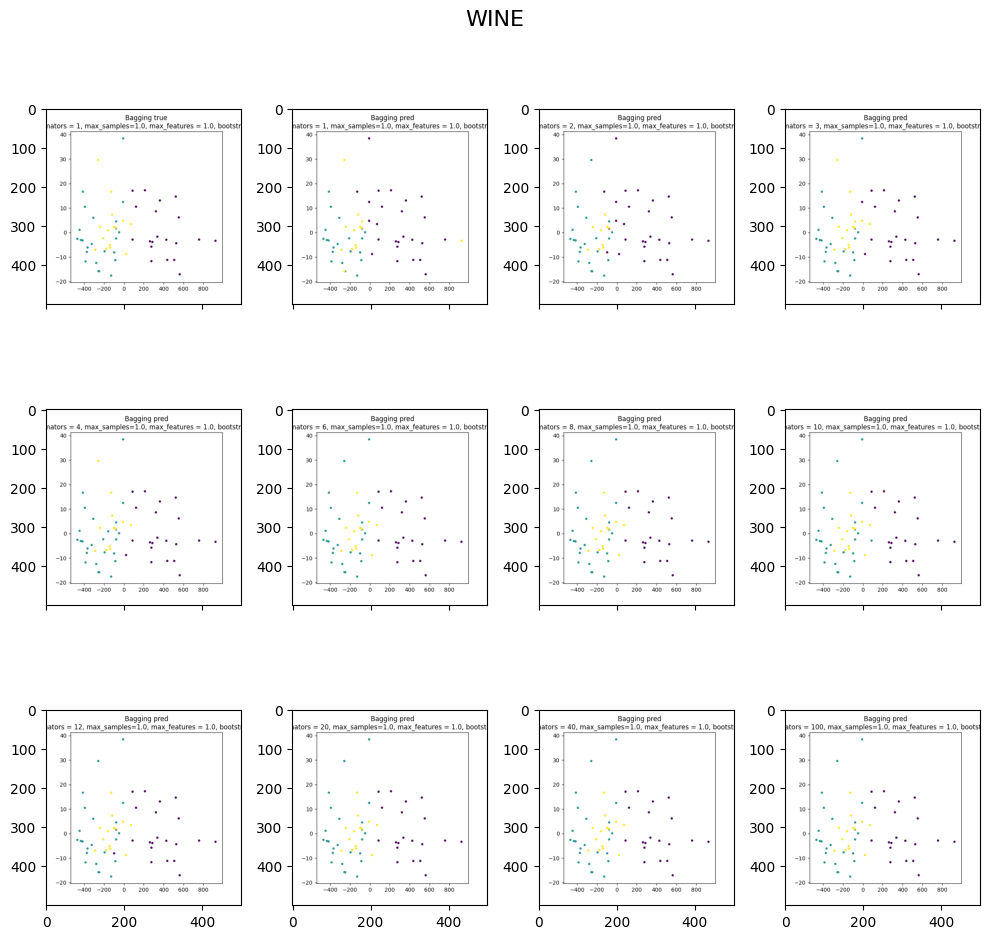

In [16]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

### Bagging - liczba probek

In [17]:

study_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
results_list = [
[run_bagging (df_seeds, max_samples = c) for c in study_vals],
[run_bagging (df_glass, max_samples = c) for c in study_vals],
[run_bagging (df_wine, max_samples = c) for c in study_vals],
]


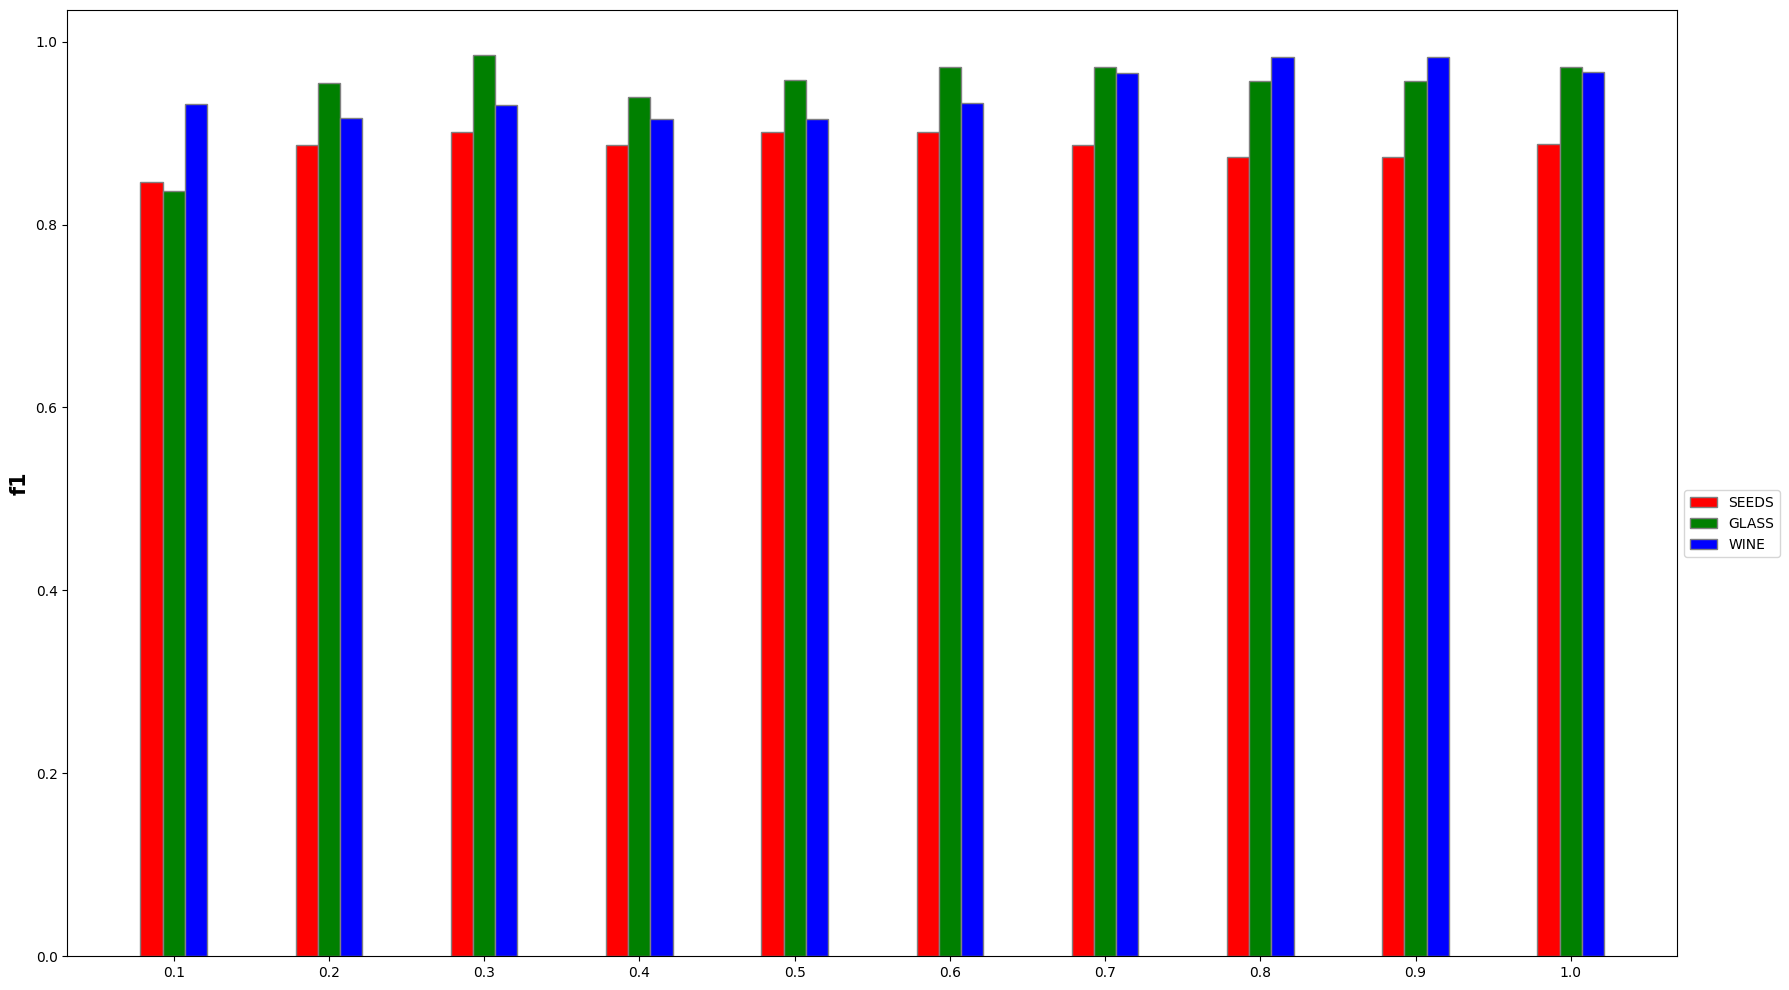

In [18]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

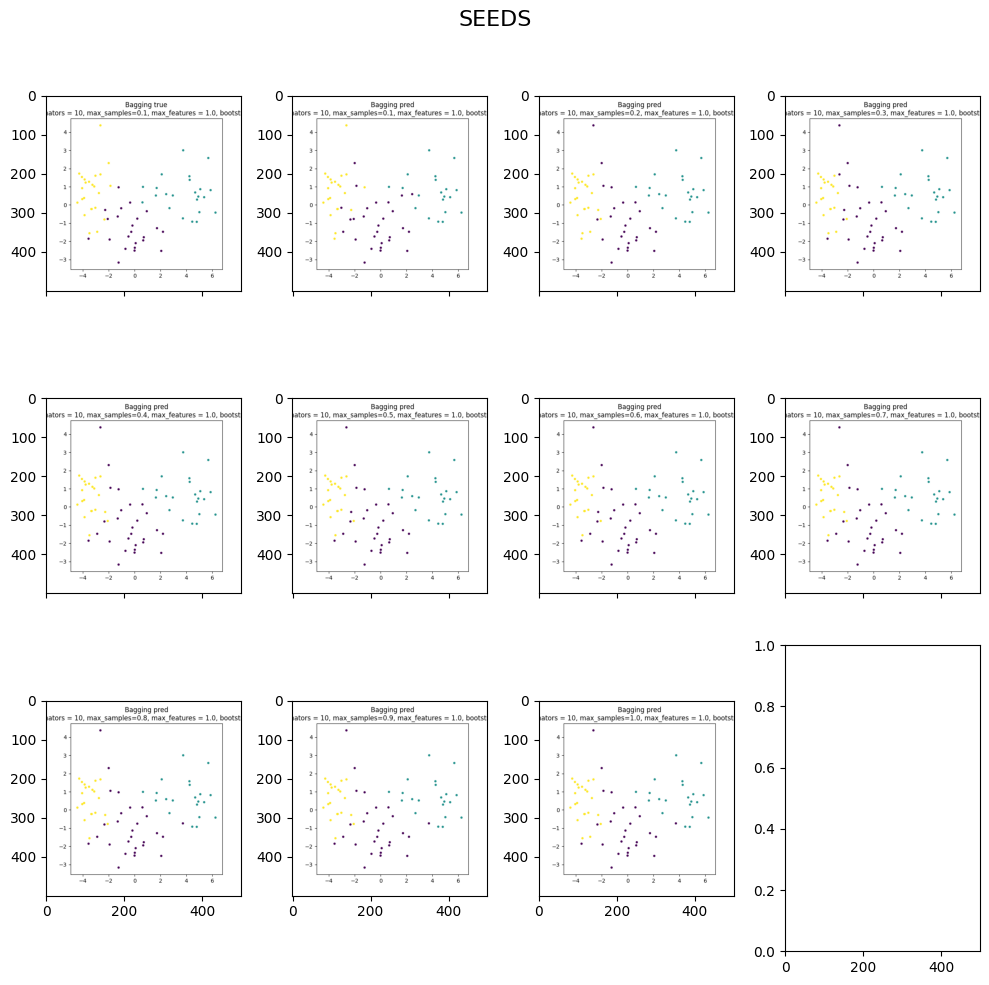

In [19]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

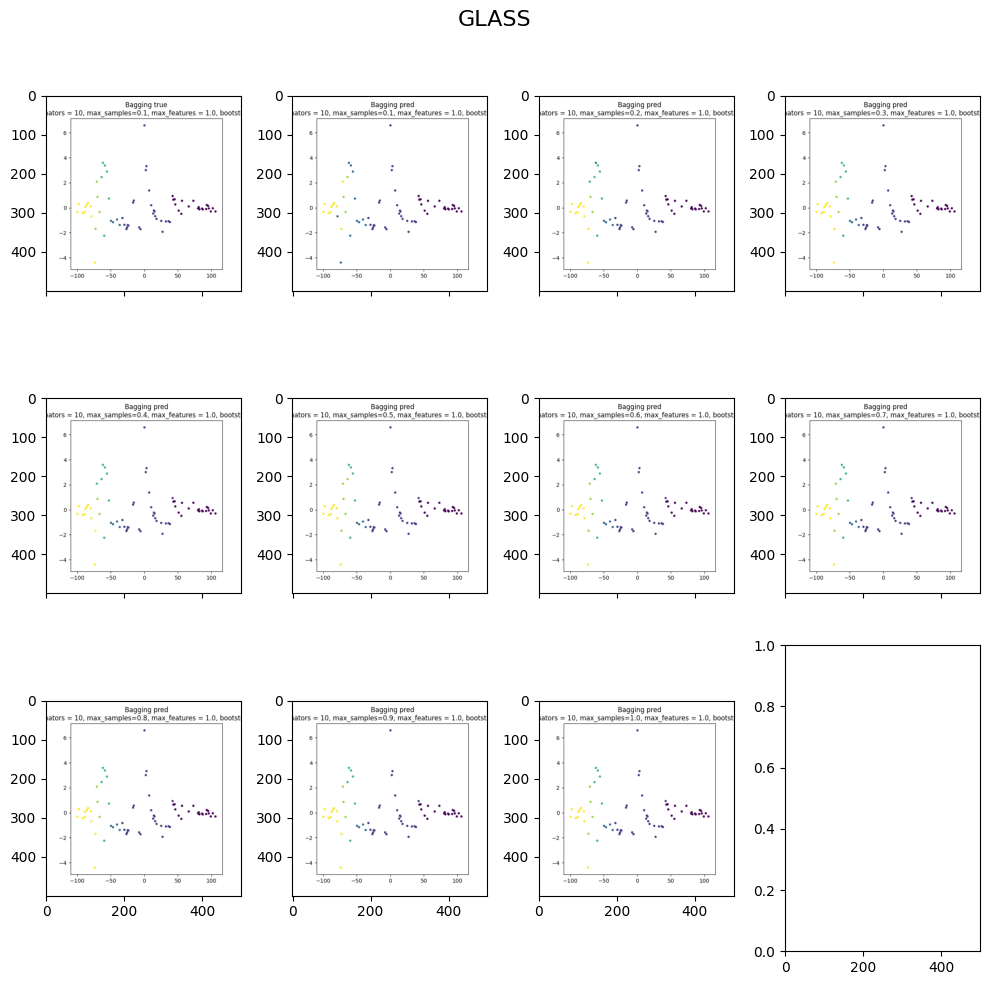

In [20]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

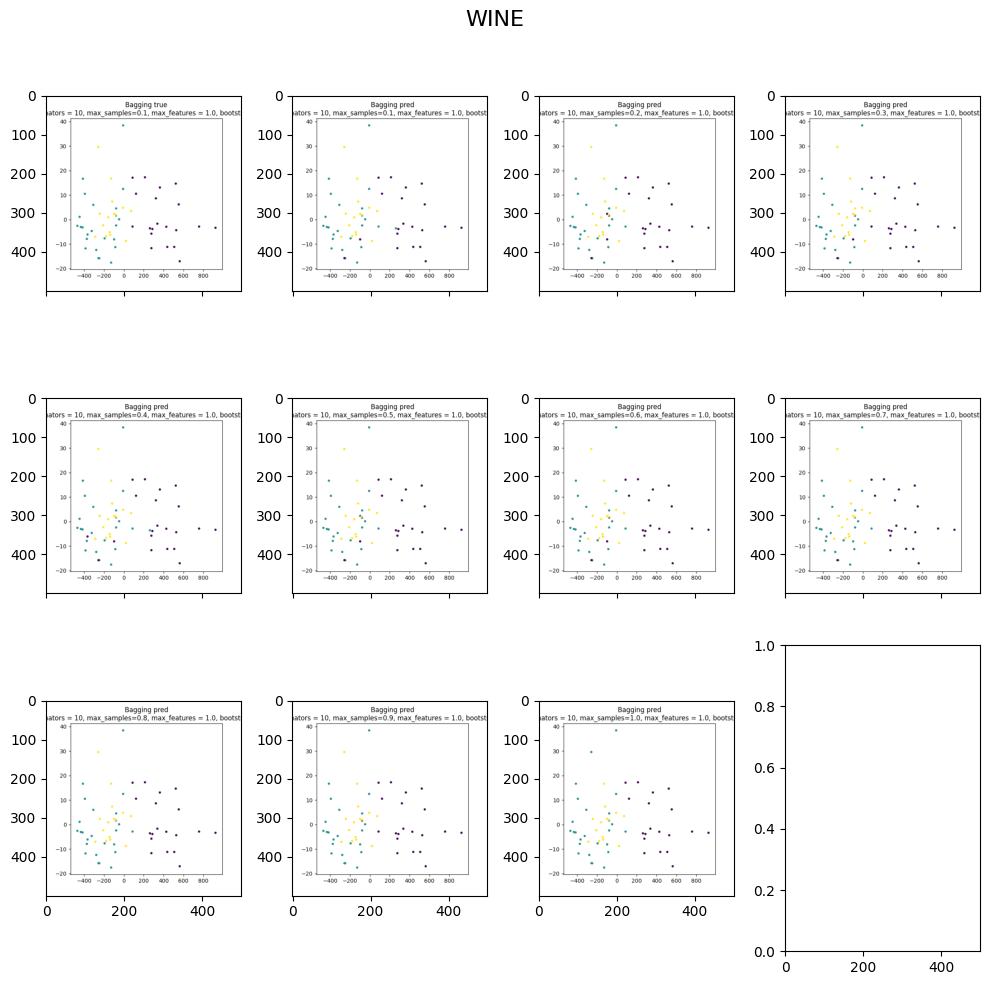

In [21]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

### Bagging - liczba atrybutow

In [22]:

study_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
results_list = [
[run_bagging (df_seeds, max_features = c) for c in study_vals],
[run_bagging (df_glass, max_features = c) for c in study_vals],
[run_bagging (df_wine, max_features = c) for c in study_vals],
]


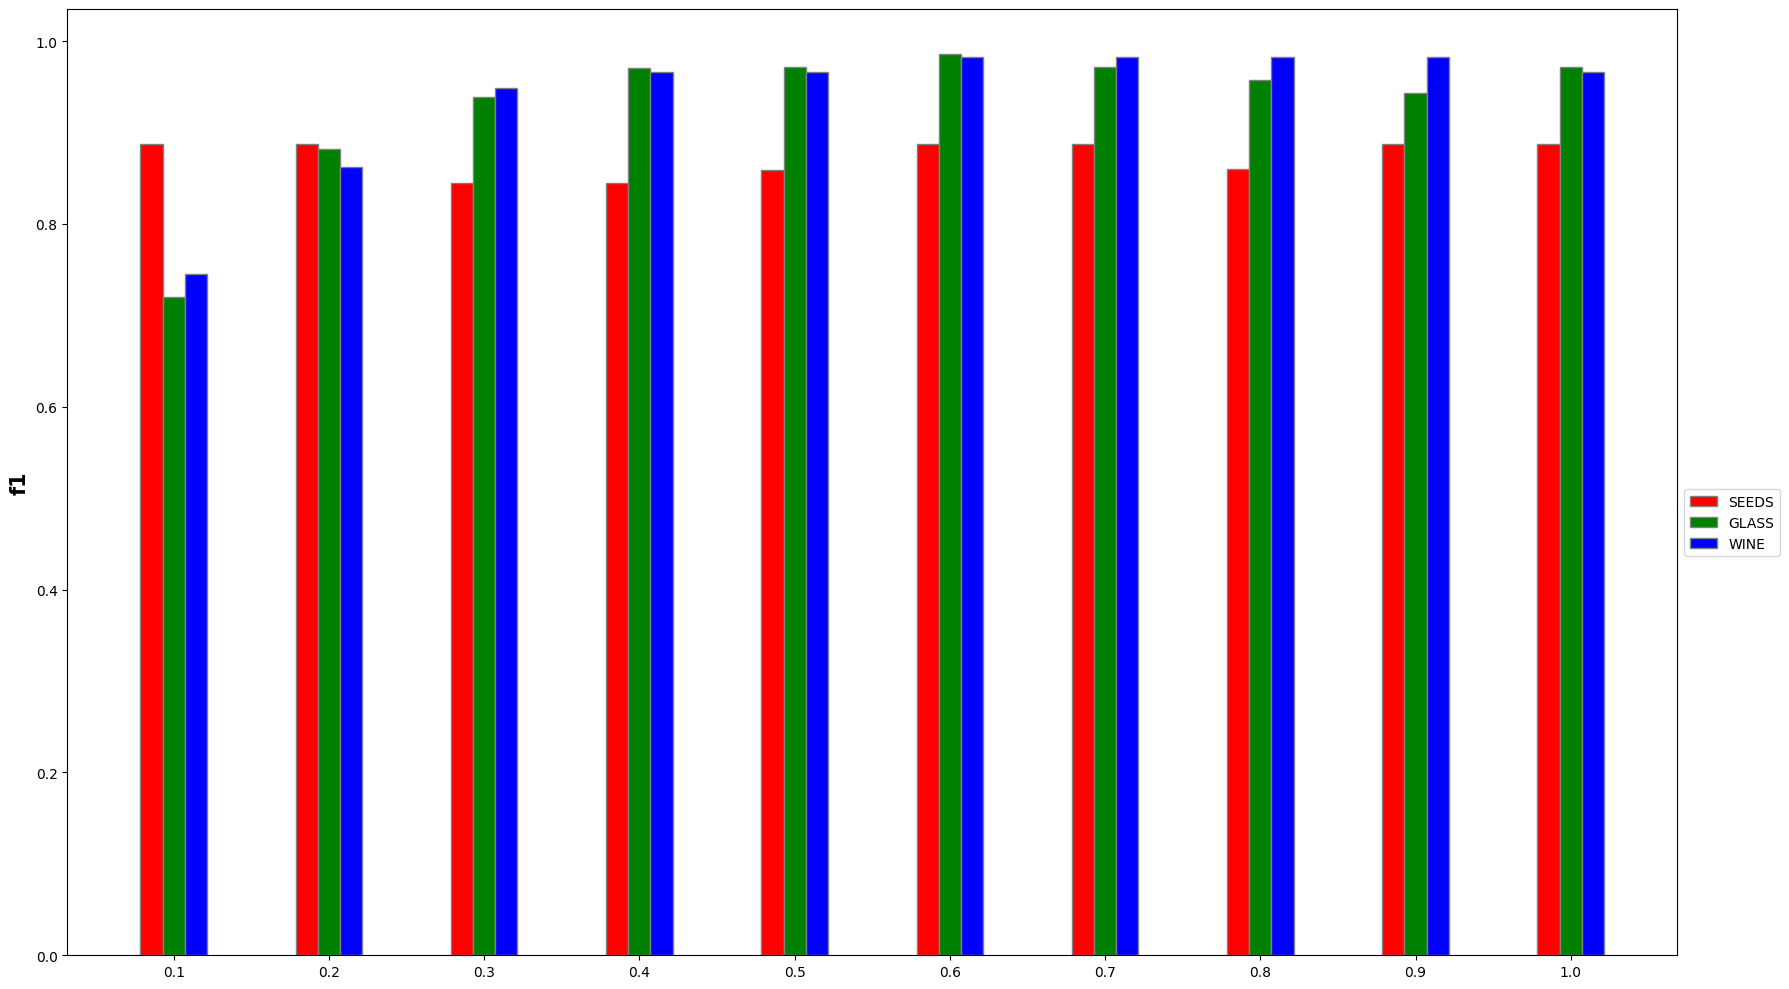

In [23]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

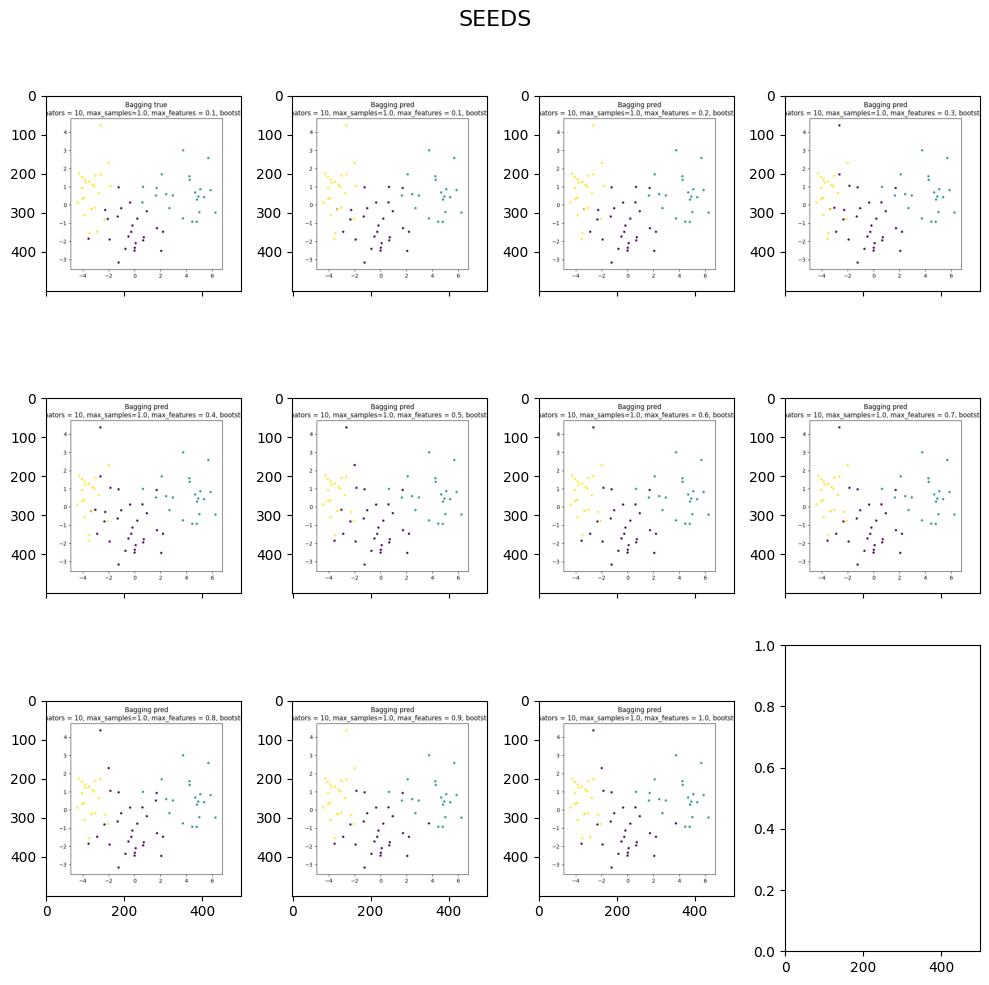

In [24]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

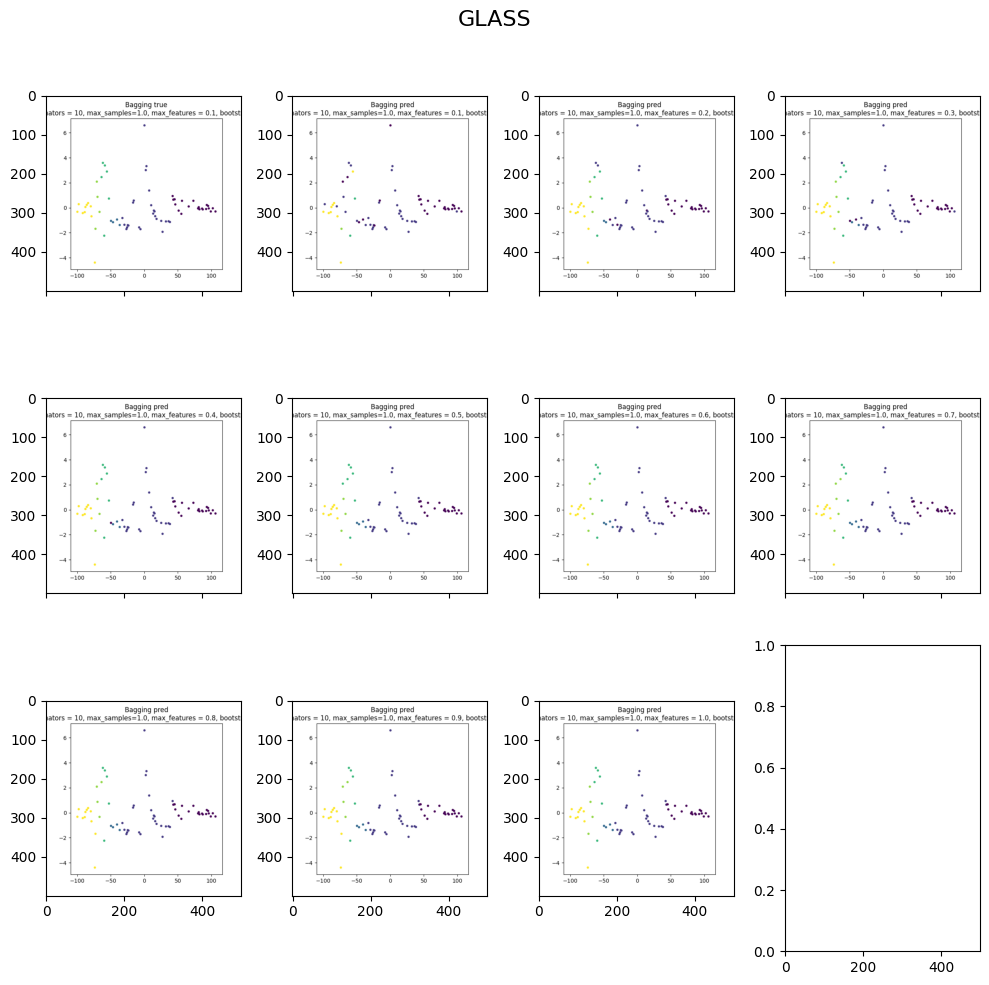

In [25]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

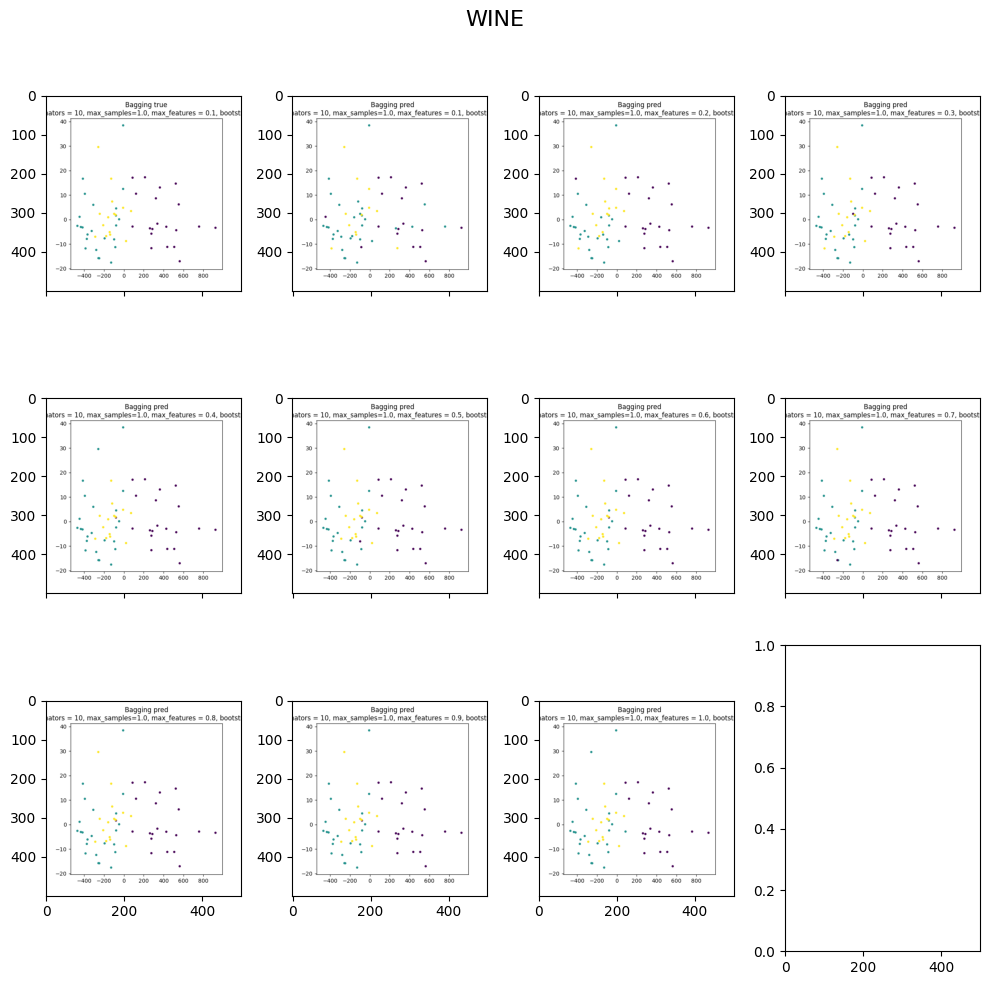

In [26]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

### Bagging - bootstrap

In [27]:

study_vals = [True, False]
results_list = [
[run_bagging (df_seeds, bootstrap = c) for c in study_vals],
[run_bagging (df_glass, bootstrap = c) for c in study_vals],
[run_bagging (df_wine, bootstrap = c) for c in study_vals],
]


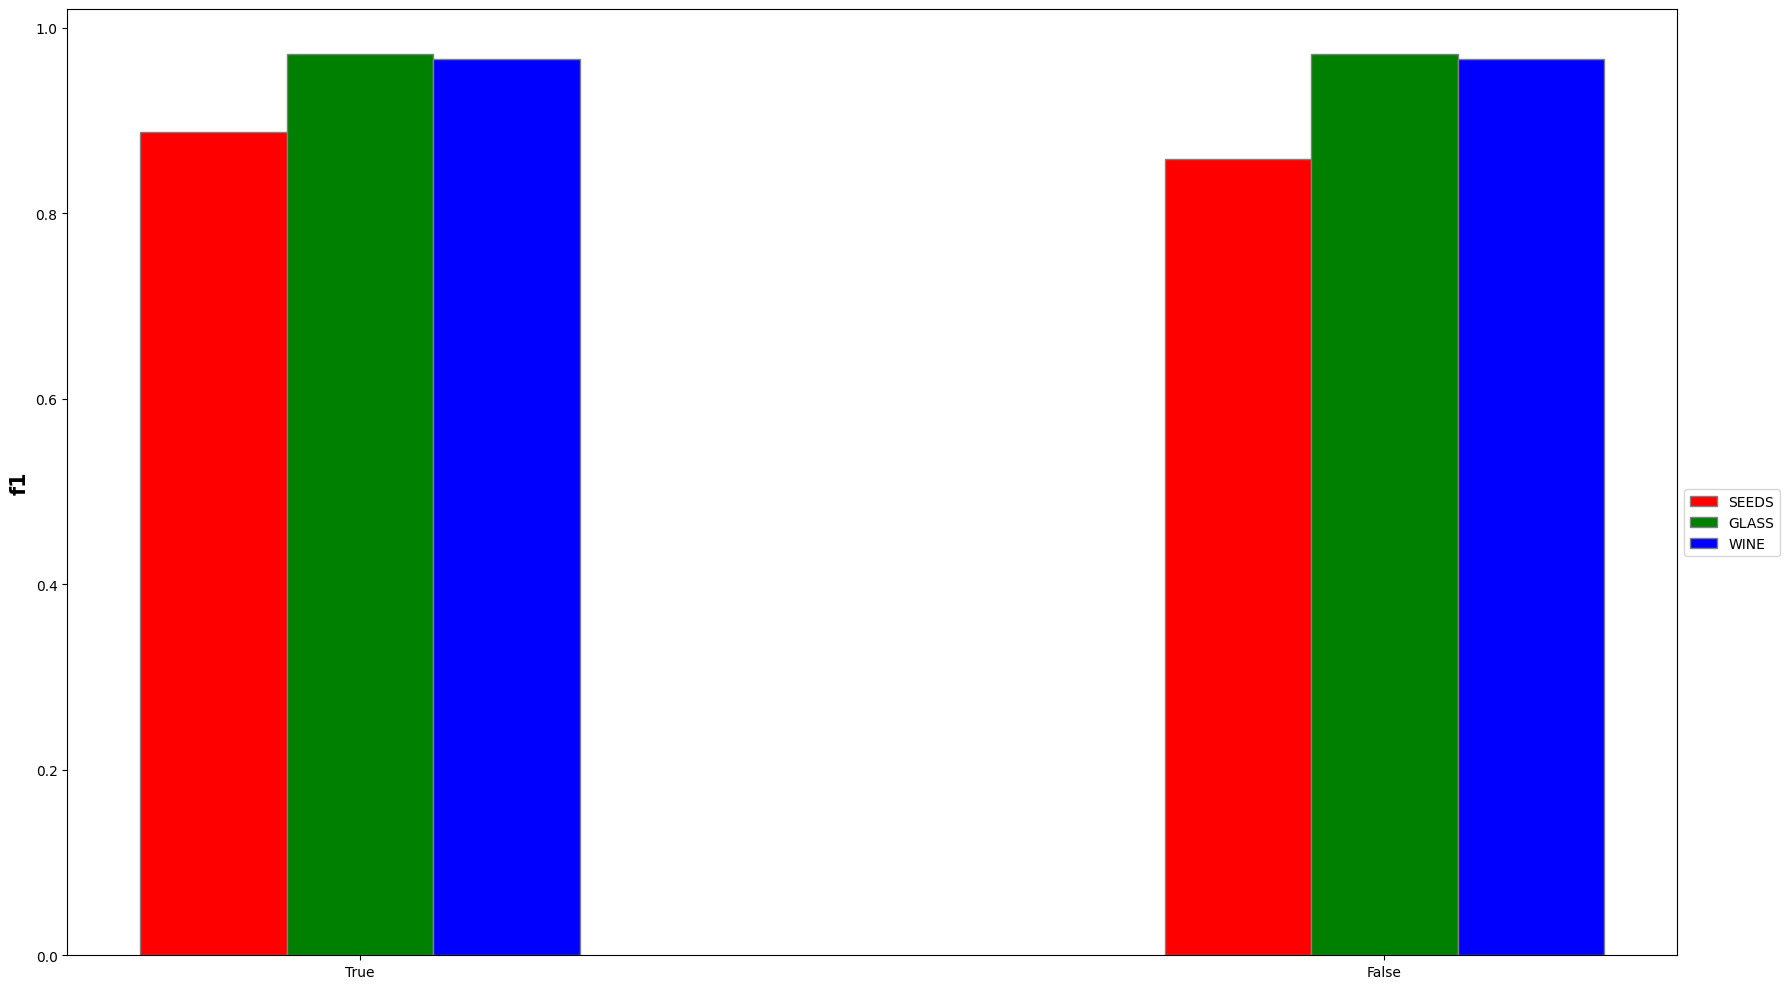

In [28]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

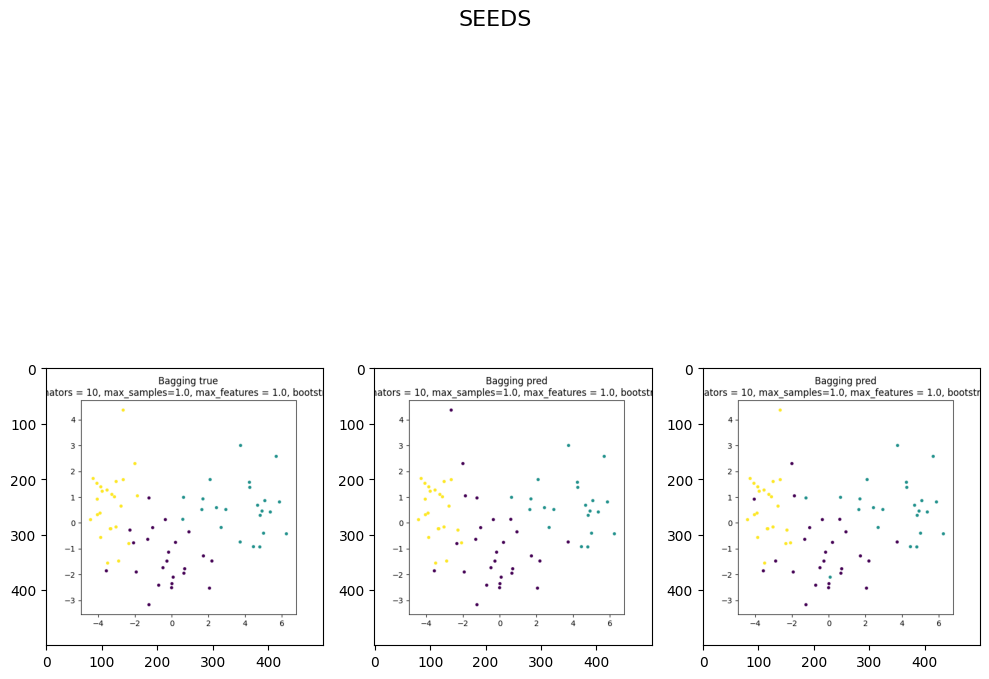

In [29]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

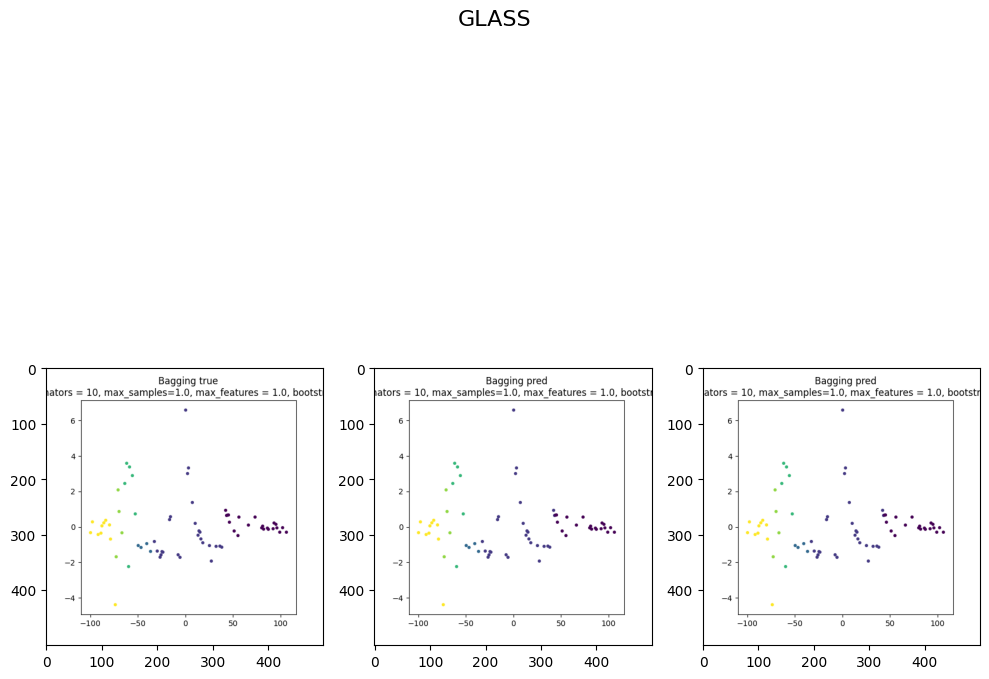

In [30]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

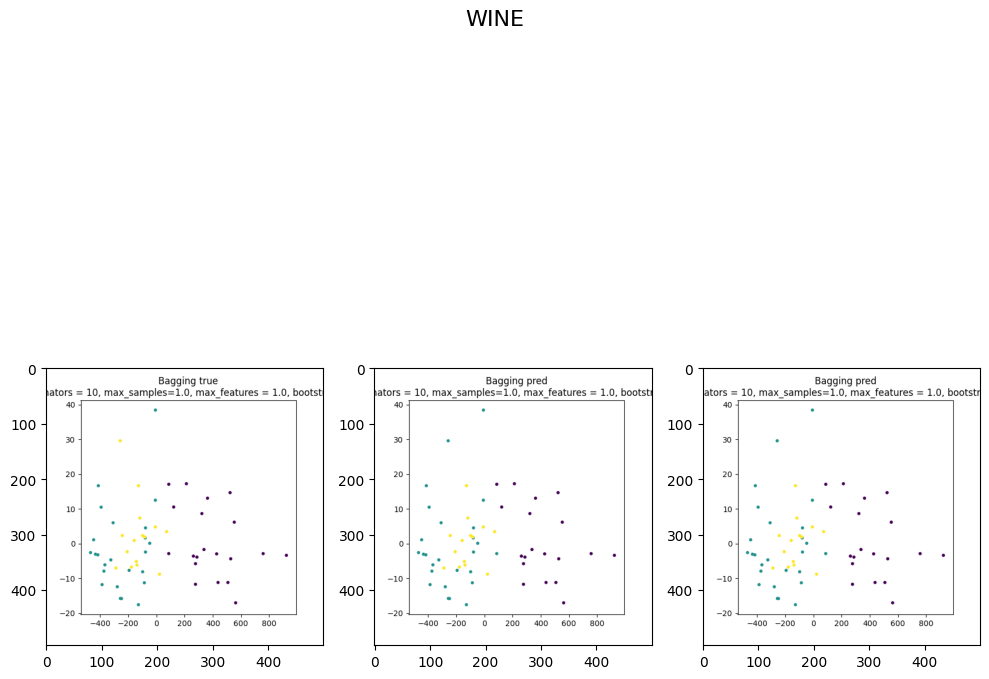

In [31]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

## Boosting

0.8784873949579831


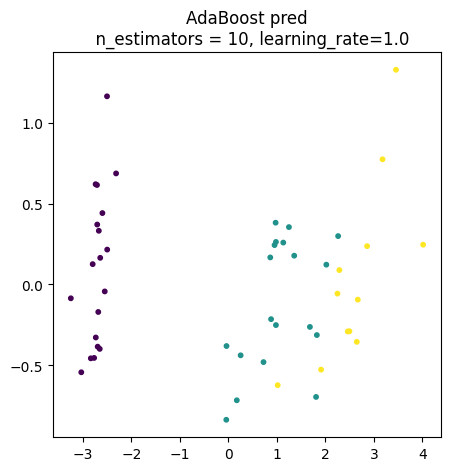

In [32]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

def run_adaboost(df, n_estimators = 10, learning_rate = 1.0):
    df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)    
    clf = AdaBoostClassifier(n_estimators = n_estimators, learning_rate = learning_rate, random_state=42)
    clf = Pipeline([('imputate', SimpleImputer( strategy='mean')),
                    ('standardization', StandardScaler()),
                    ('clf', clf),])
    
    clf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    y_true = df_test.iloc[:, -1].tolist()
    y_pred = clf.predict(df_test.iloc[:, :-1])

    X_reduced = PCA(n_components=2).fit_transform(df_test)

    pred_fig = plt.figure(1, figsize=(5, 5))
    ax1 = pred_fig.add_subplot()
    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_pred)
    ax1.set_title(f"AdaBoost pred\n  n_estimators = {n_estimators}, learning_rate={learning_rate}")
    plt.close()

    true_fig = plt.figure(2, figsize=(5, 5))
    ax2 = true_fig.add_subplot()
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_true)
    ax2.set_title(f"AdaBoost true\n  n_estimators = {n_estimators}, learning_rate={learning_rate}")
    plt.close()

    f1 = f1_score(y_true, y_pred, average='weighted')
    
    return {'f1':f1, 
              'pred_fig': pred_fig, 'true_fig': true_fig,}

test_run = run_adaboost(df_iris)
print(test_run['f1'])
test_run['pred_fig']

### AdaBoost - liczba klasyfikatorow

In [33]:

study_vals = [1, 2, 3, 4, 6, 8, 10, 12, 20, 40, 100]
results_list = [
[run_adaboost (df_seeds, n_estimators = c) for c in study_vals],
[run_adaboost (df_glass, n_estimators = c) for c in study_vals],
[run_adaboost (df_wine, n_estimators = c) for c in study_vals],
]


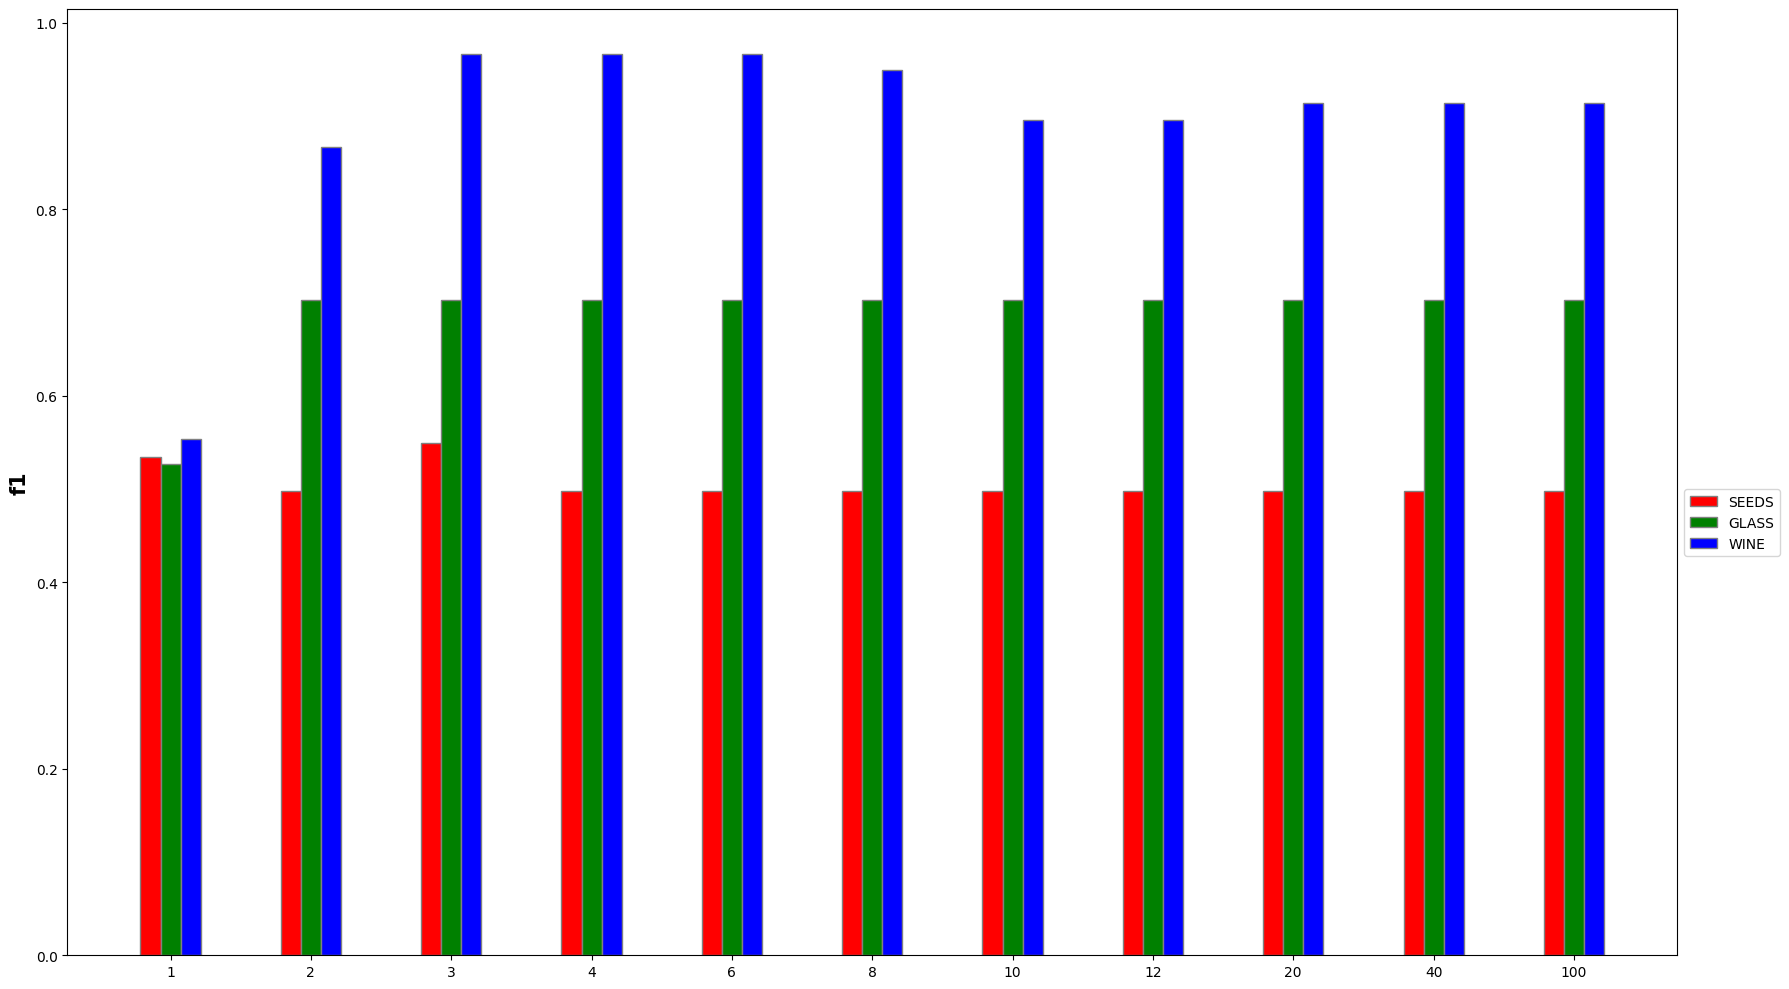

In [34]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

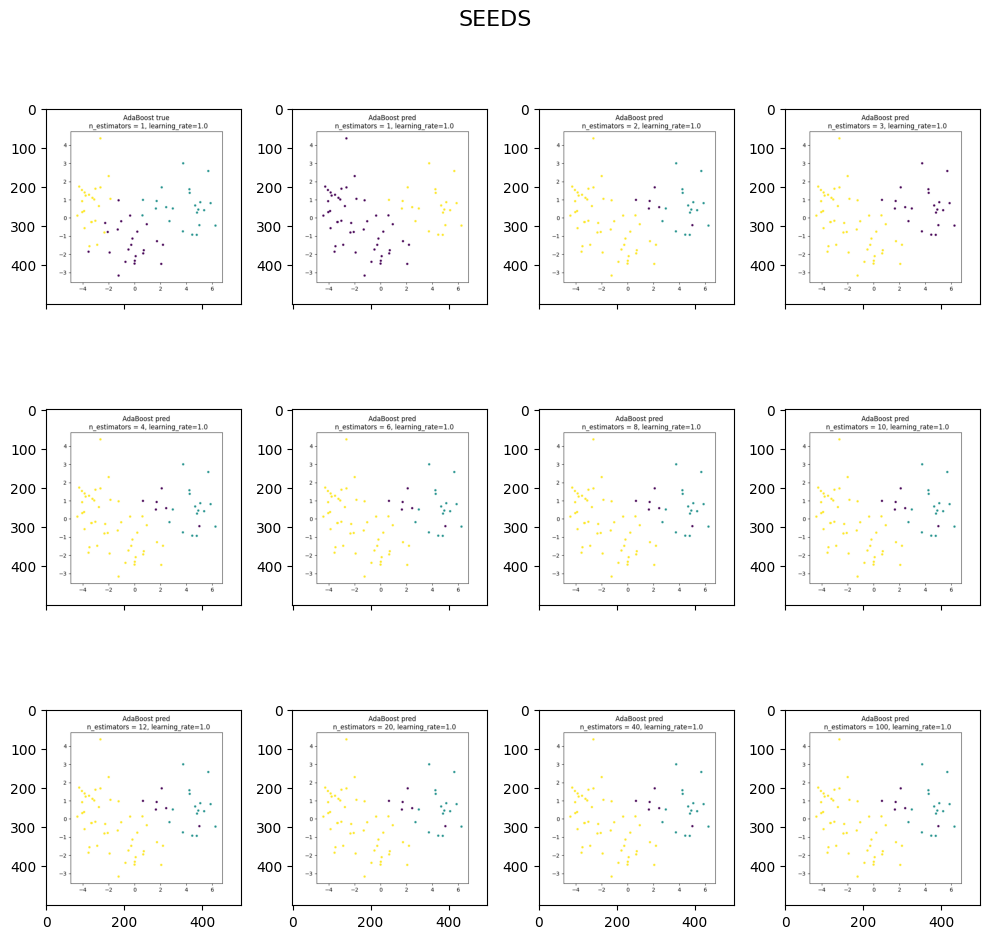

In [35]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

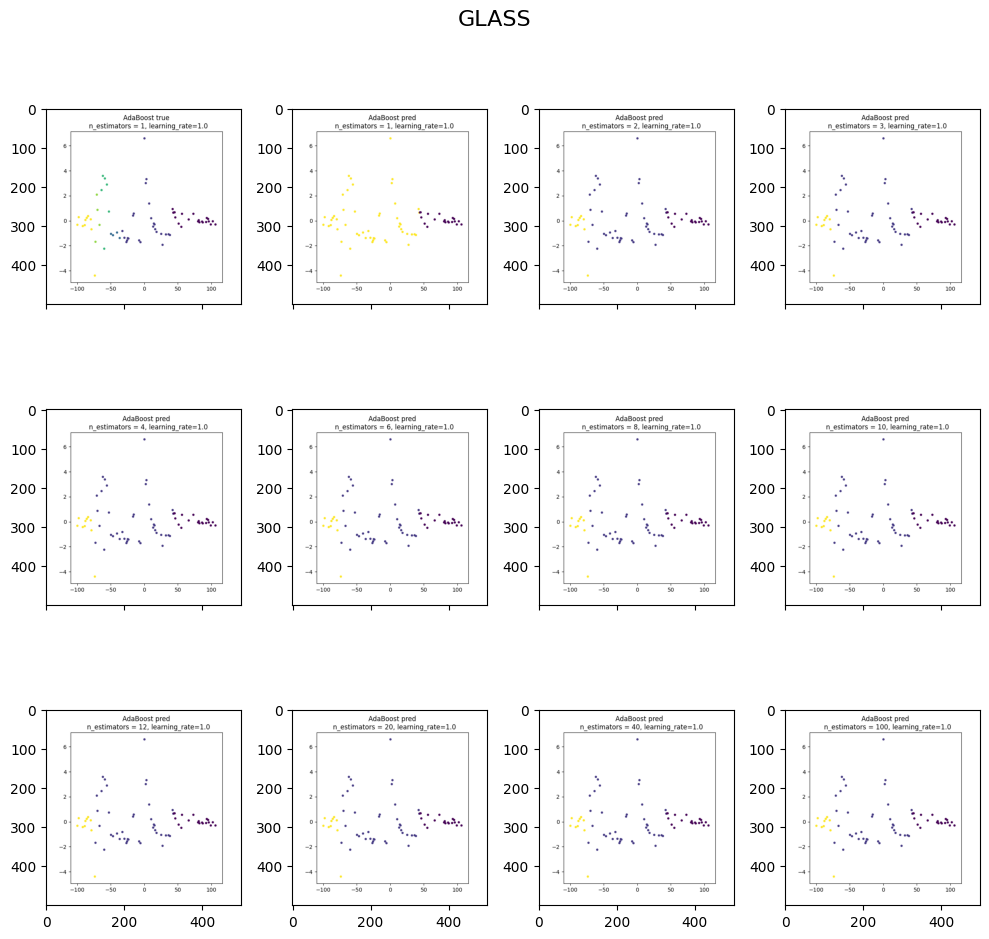

In [36]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

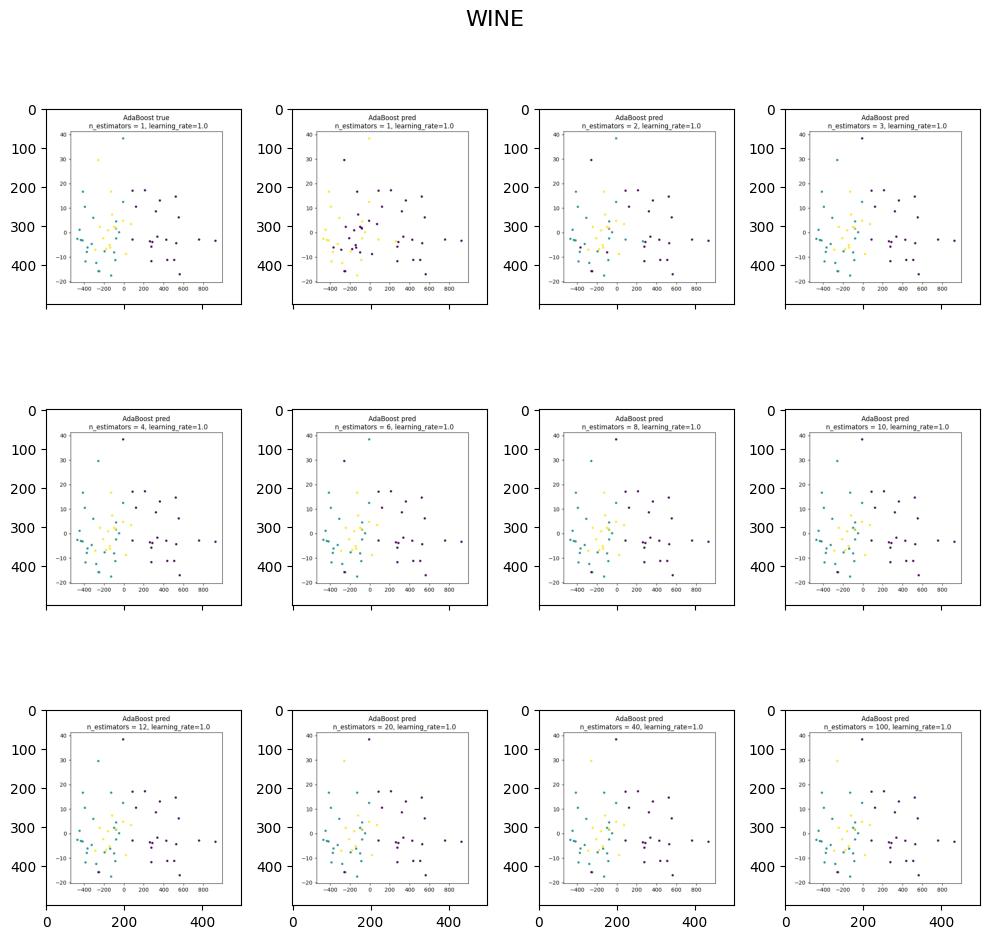

In [37]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

### AdaBoost - wspl uczenia

In [38]:

study_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
results_list = [
[run_adaboost (df_seeds, learning_rate = c) for c in study_vals],
[run_adaboost (df_glass, learning_rate = c) for c in study_vals],
[run_adaboost (df_wine, learning_rate = c) for c in study_vals],
]

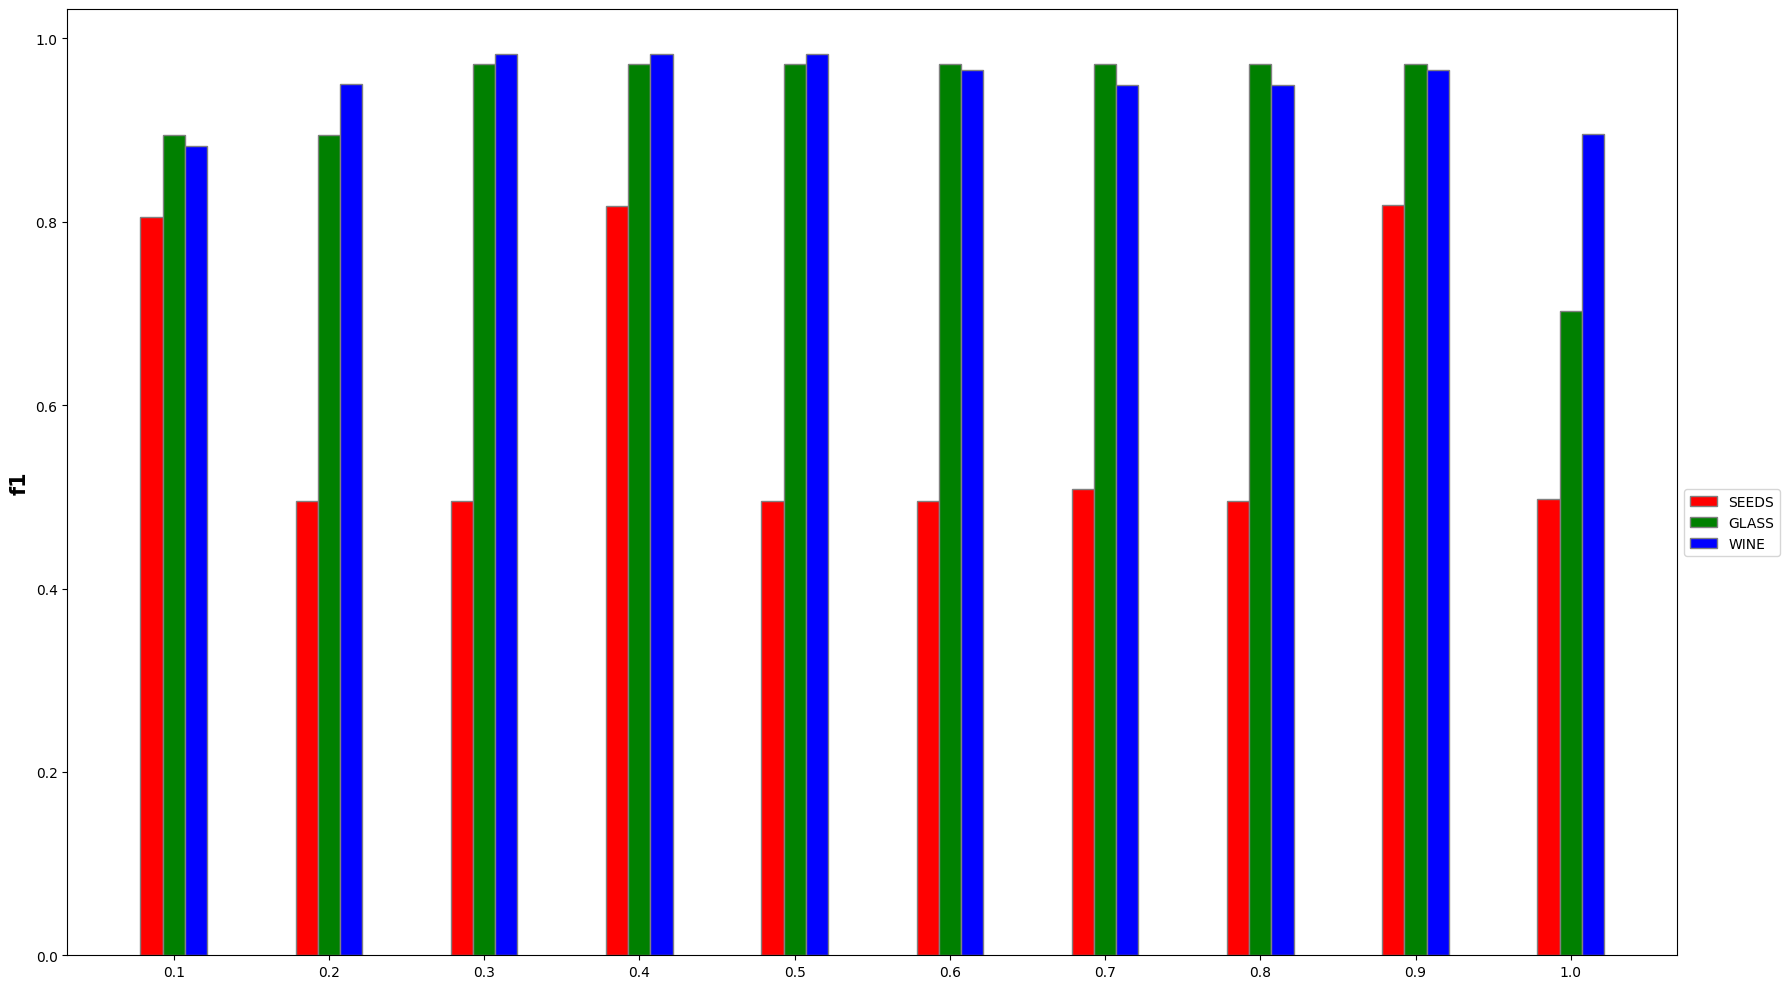

In [39]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

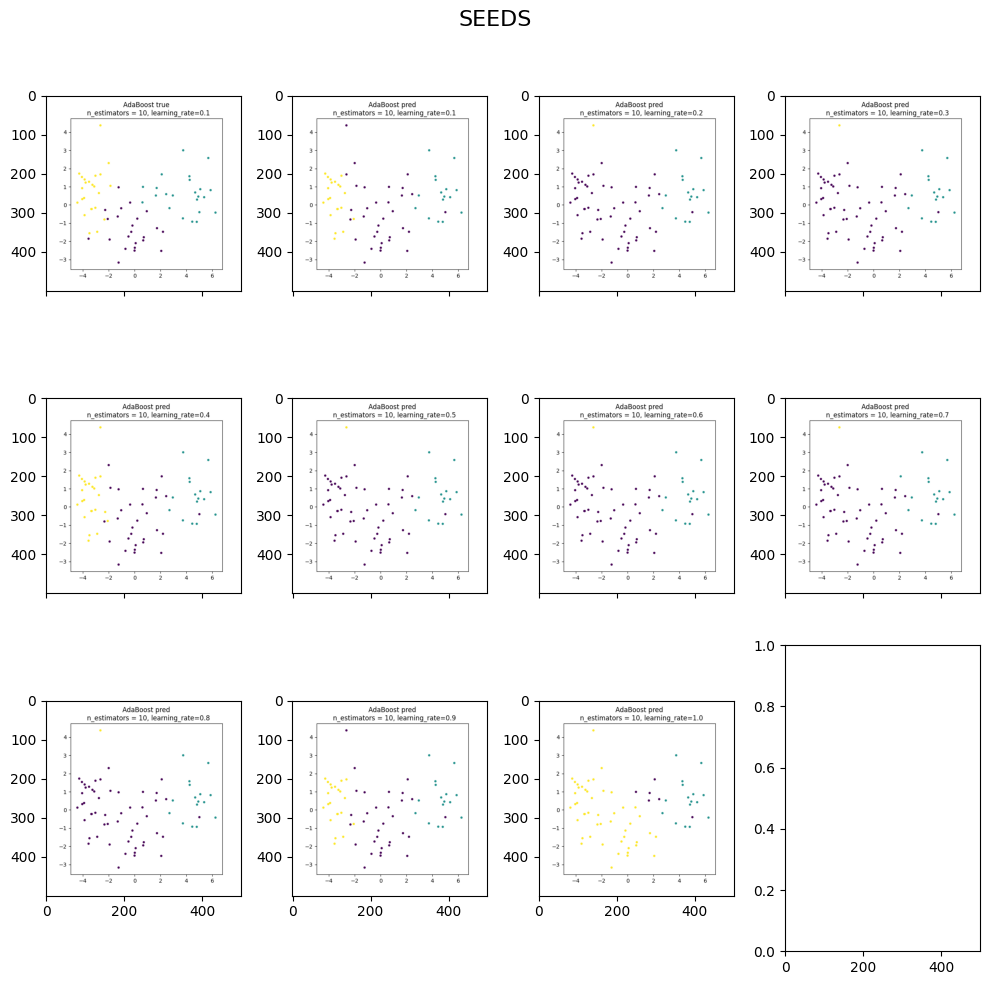

In [40]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

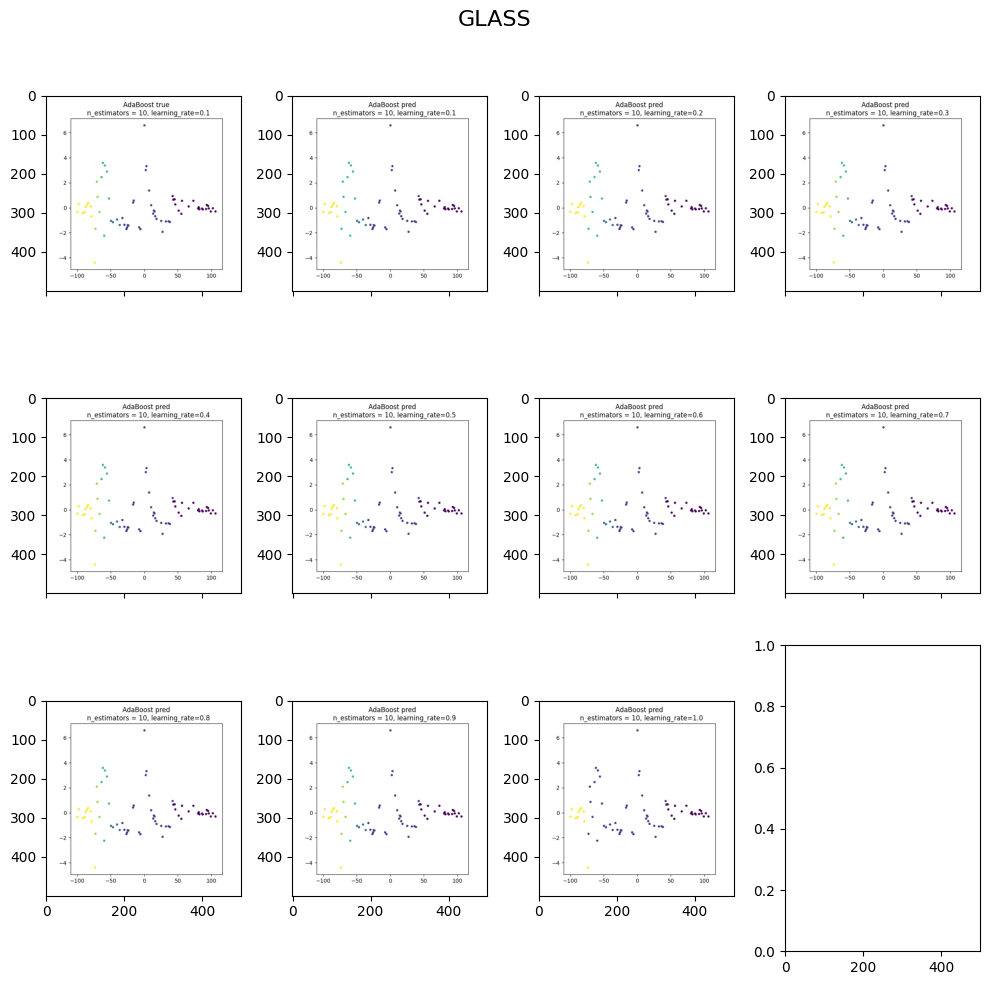

In [41]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

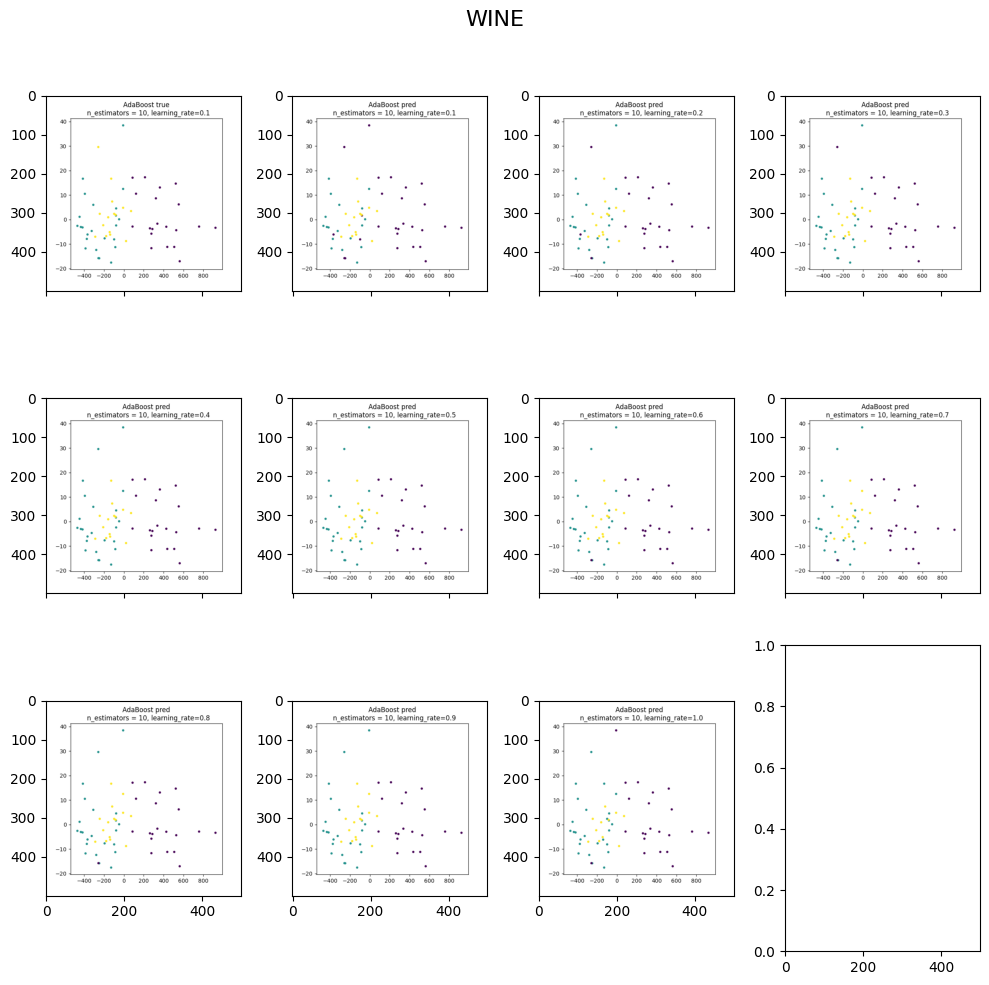

In [42]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

## Random forest

0.98


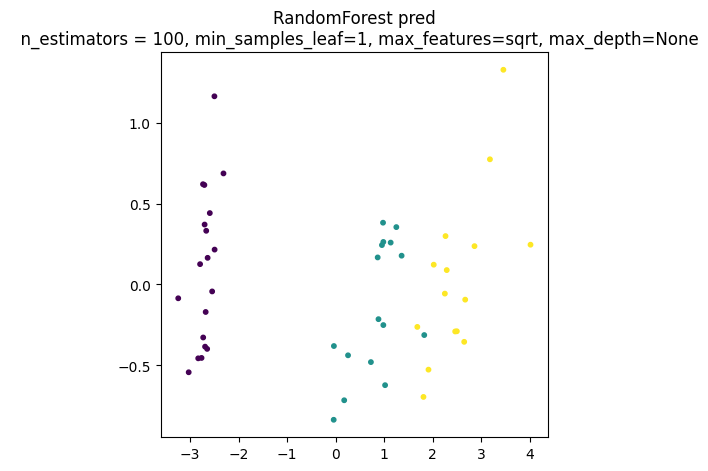

In [43]:
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def run_random_forest(df, n_estimators = 100, min_samples_leaf = 1, max_features ='sqrt', max_depth = None):
    df_train, df_test = train_test_split( df, test_size=0.33, random_state=42)    
    clf = RandomForestClassifier(n_estimators = n_estimators, min_samples_leaf = min_samples_leaf,
                             max_features = max_features,  max_depth = max_depth, random_state=42)
    clf = Pipeline([('imputate', SimpleImputer( strategy='mean')),
                    ('standardization', StandardScaler()),
                    ('clf', clf),])
    
    clf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

    y_true = df_test.iloc[:, -1].tolist()
    y_pred = clf.predict(df_test.iloc[:, :-1])

    X_reduced = PCA(n_components=2).fit_transform(df_test)

    pred_fig = plt.figure(1, figsize=(5, 5))
    ax1 = pred_fig.add_subplot()
    ax1.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_pred)
    ax1.set_title(f"RandomForest pred\n  n_estimators = {n_estimators}, min_samples_leaf={min_samples_leaf}, max_features={max_features}, max_depth={max_depth}")
    plt.close()

    true_fig = plt.figure(2, figsize=(5, 5))
    ax2 = true_fig.add_subplot()
    ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c=y_true)
    ax2.set_title(f"RandomForest true\n  n_estimators = {n_estimators}, min_samples_leaf={min_samples_leaf}, max_features={max_features}, max_depth={max_depth}")
    plt.close()

    f1 = f1_score(y_true, y_pred, average='weighted')
    
    return {'f1':f1, 
              'pred_fig': pred_fig, 'true_fig': true_fig,}

test_run = run_random_forest(df_iris)
print(test_run['f1'])
test_run['pred_fig']

### Random forest - liczba drzew

In [44]:

study_vals = [1, 5, 10, 12, 20, 40, 100, 200, 500]
results_list = [
[run_random_forest (df_seeds, n_estimators = c) for c in study_vals],
[run_random_forest (df_glass, n_estimators = c) for c in study_vals],
[run_random_forest (df_wine, n_estimators = c) for c in study_vals],
]


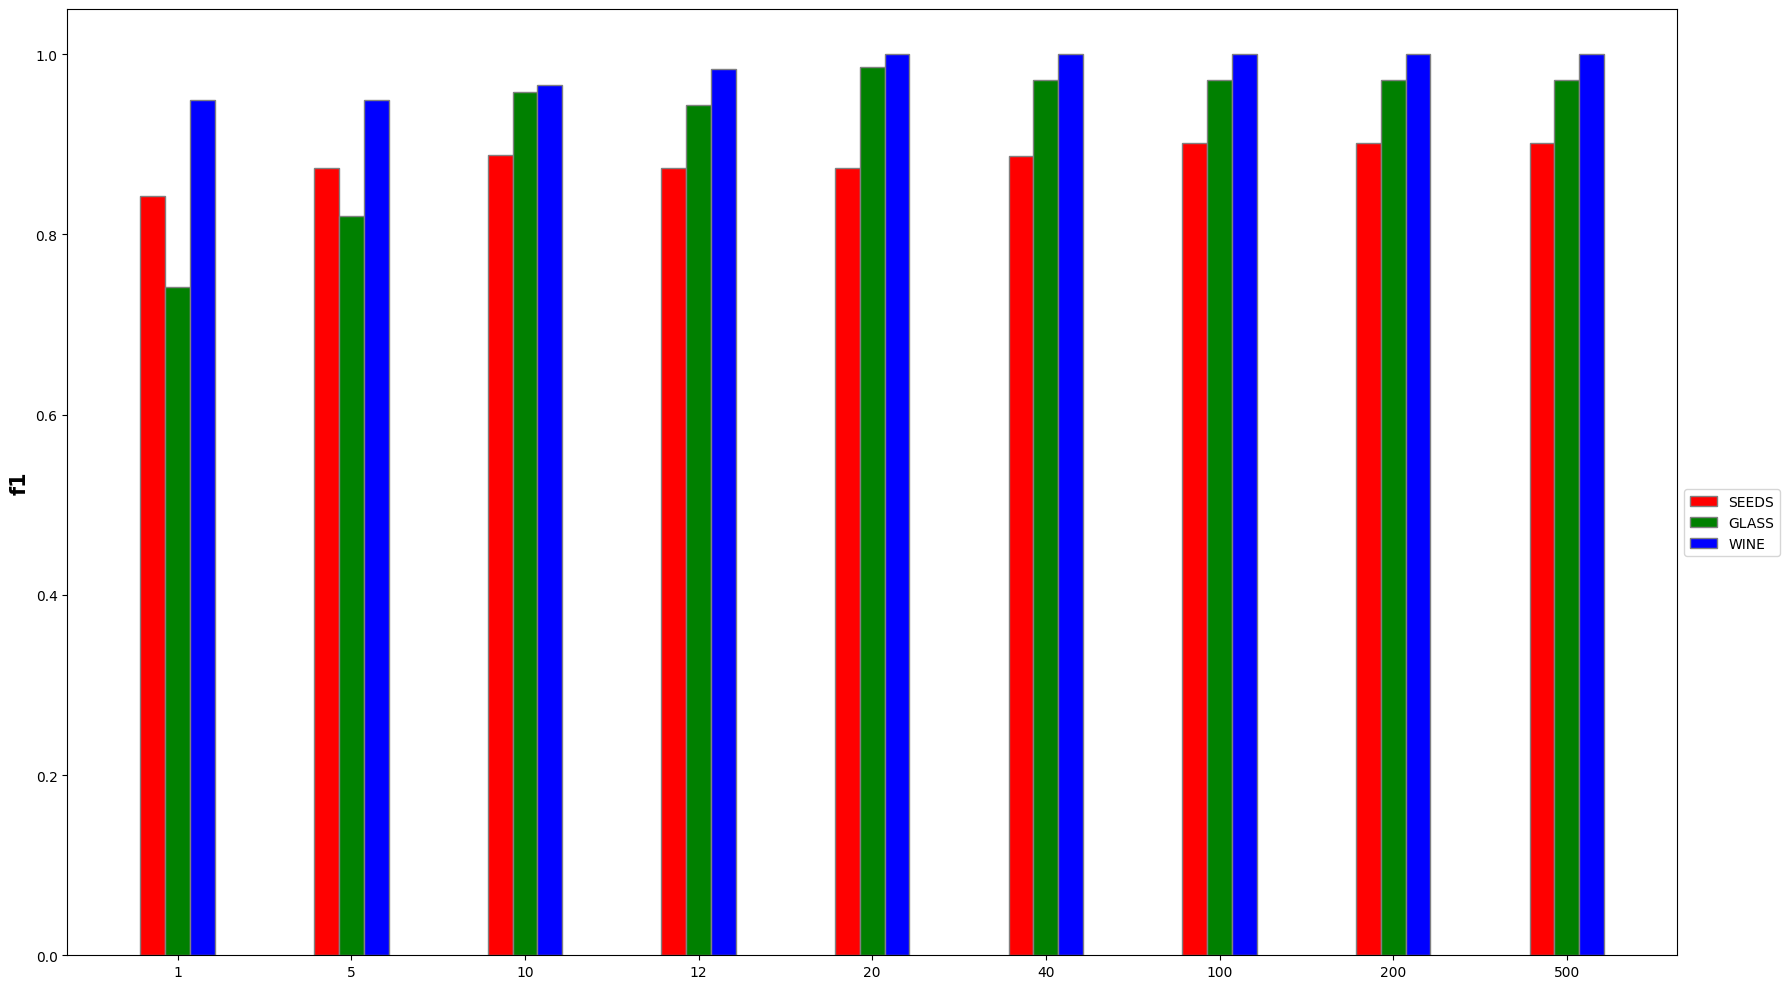

In [45]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

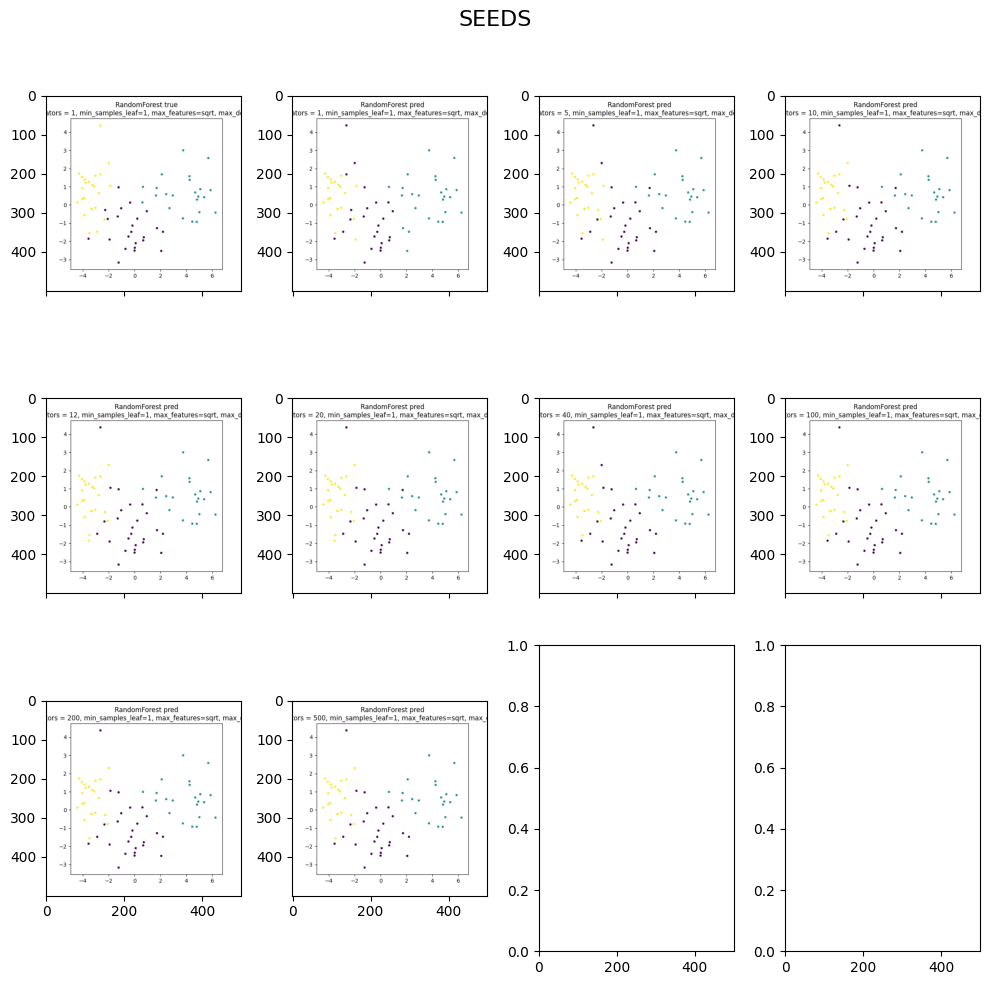

In [46]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

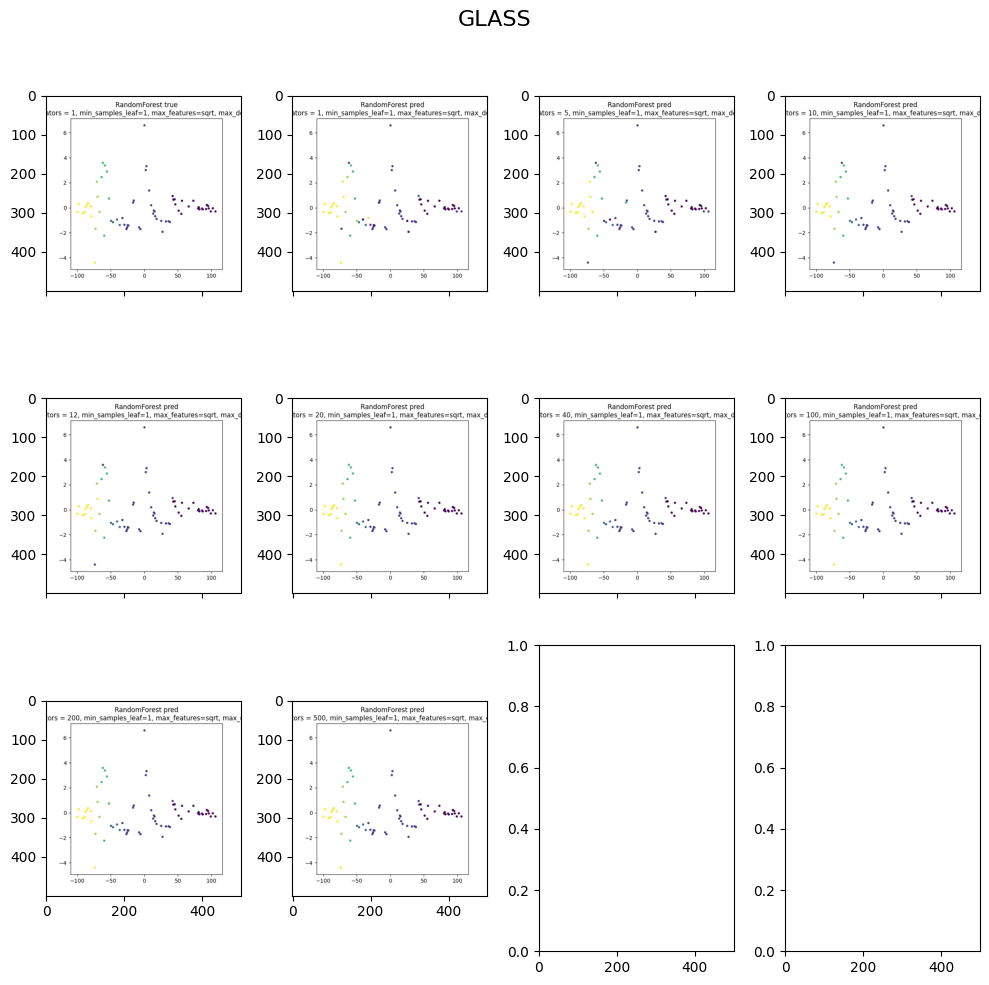

In [47]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

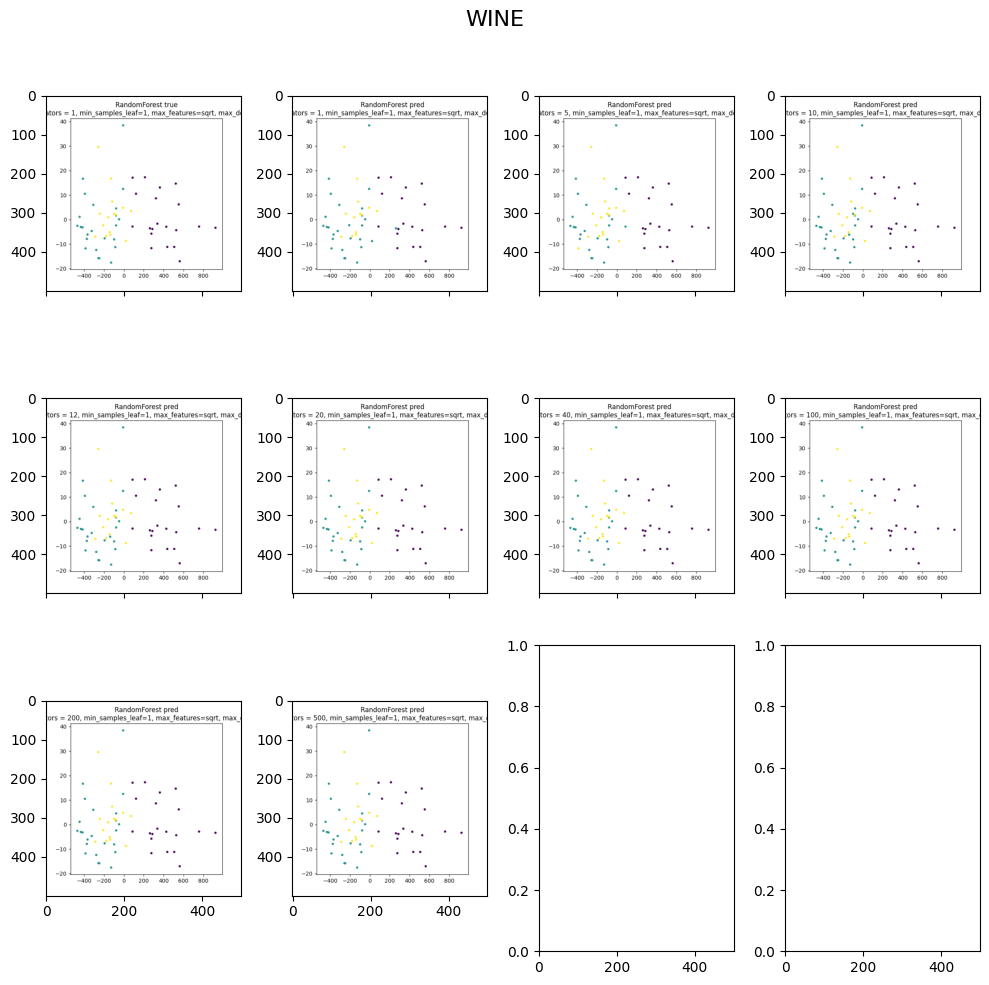

In [48]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

### Random forest - liczba samplow

In [49]:

study_vals = [1, 3, 5, 10, 12, 20]
results_list = [
[run_random_forest (df_seeds, min_samples_leaf = c) for c in study_vals],
[run_random_forest (df_glass, min_samples_leaf = c) for c in study_vals],
[run_random_forest (df_wine, min_samples_leaf = c) for c in study_vals],
]


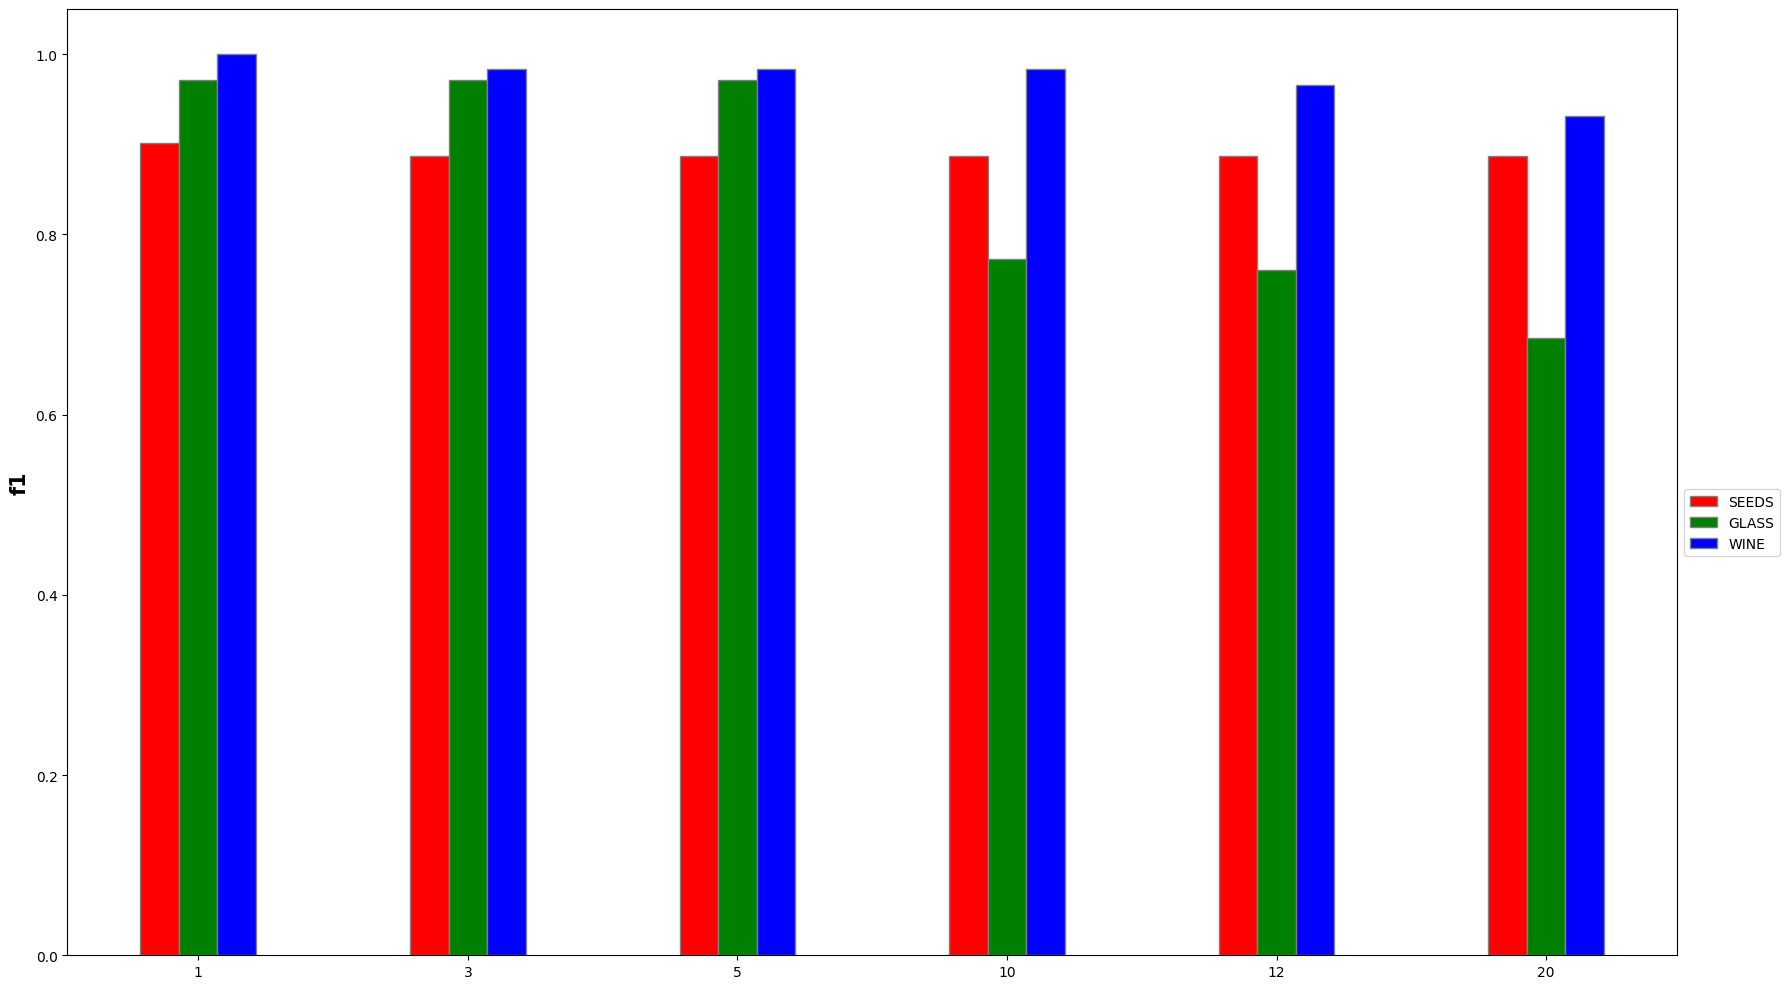

In [50]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

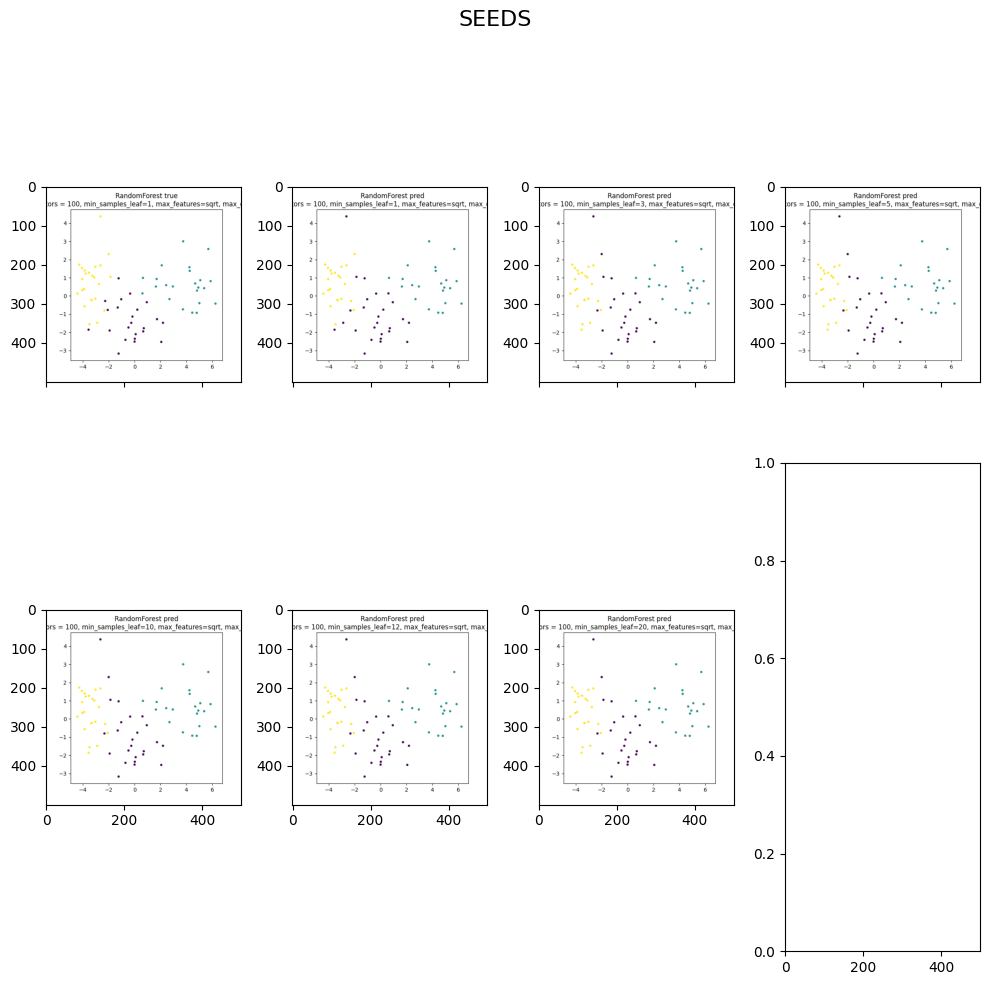

In [51]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

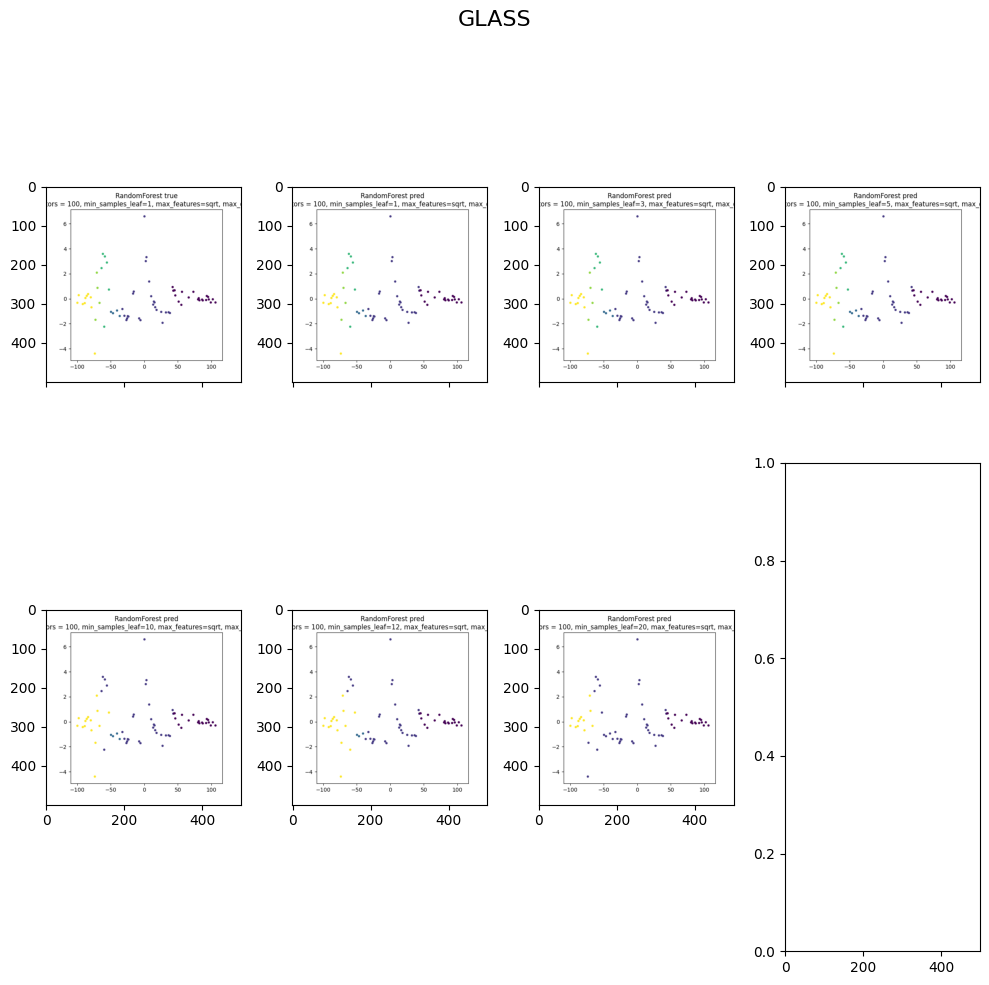

In [52]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

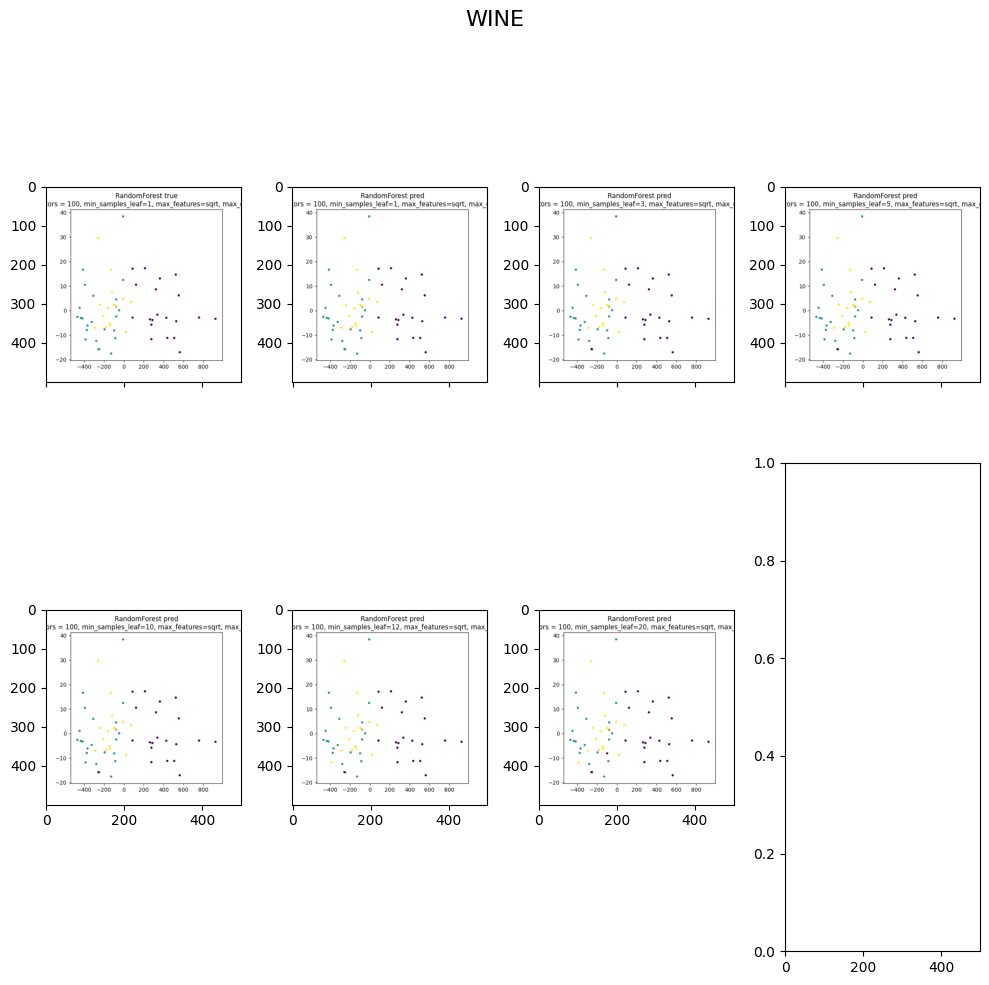

In [53]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

### Random forest - liczba cech

In [54]:

study_vals = ['sqrt', 'log2', None, 1, 3, 5, 10, 12]
results_list = [
[run_random_forest (df_seeds, max_features = c) for c in study_vals],
[run_random_forest (df_glass, max_features = c) for c in study_vals],
[run_random_forest (df_wine, max_features = c) for c in study_vals],
]


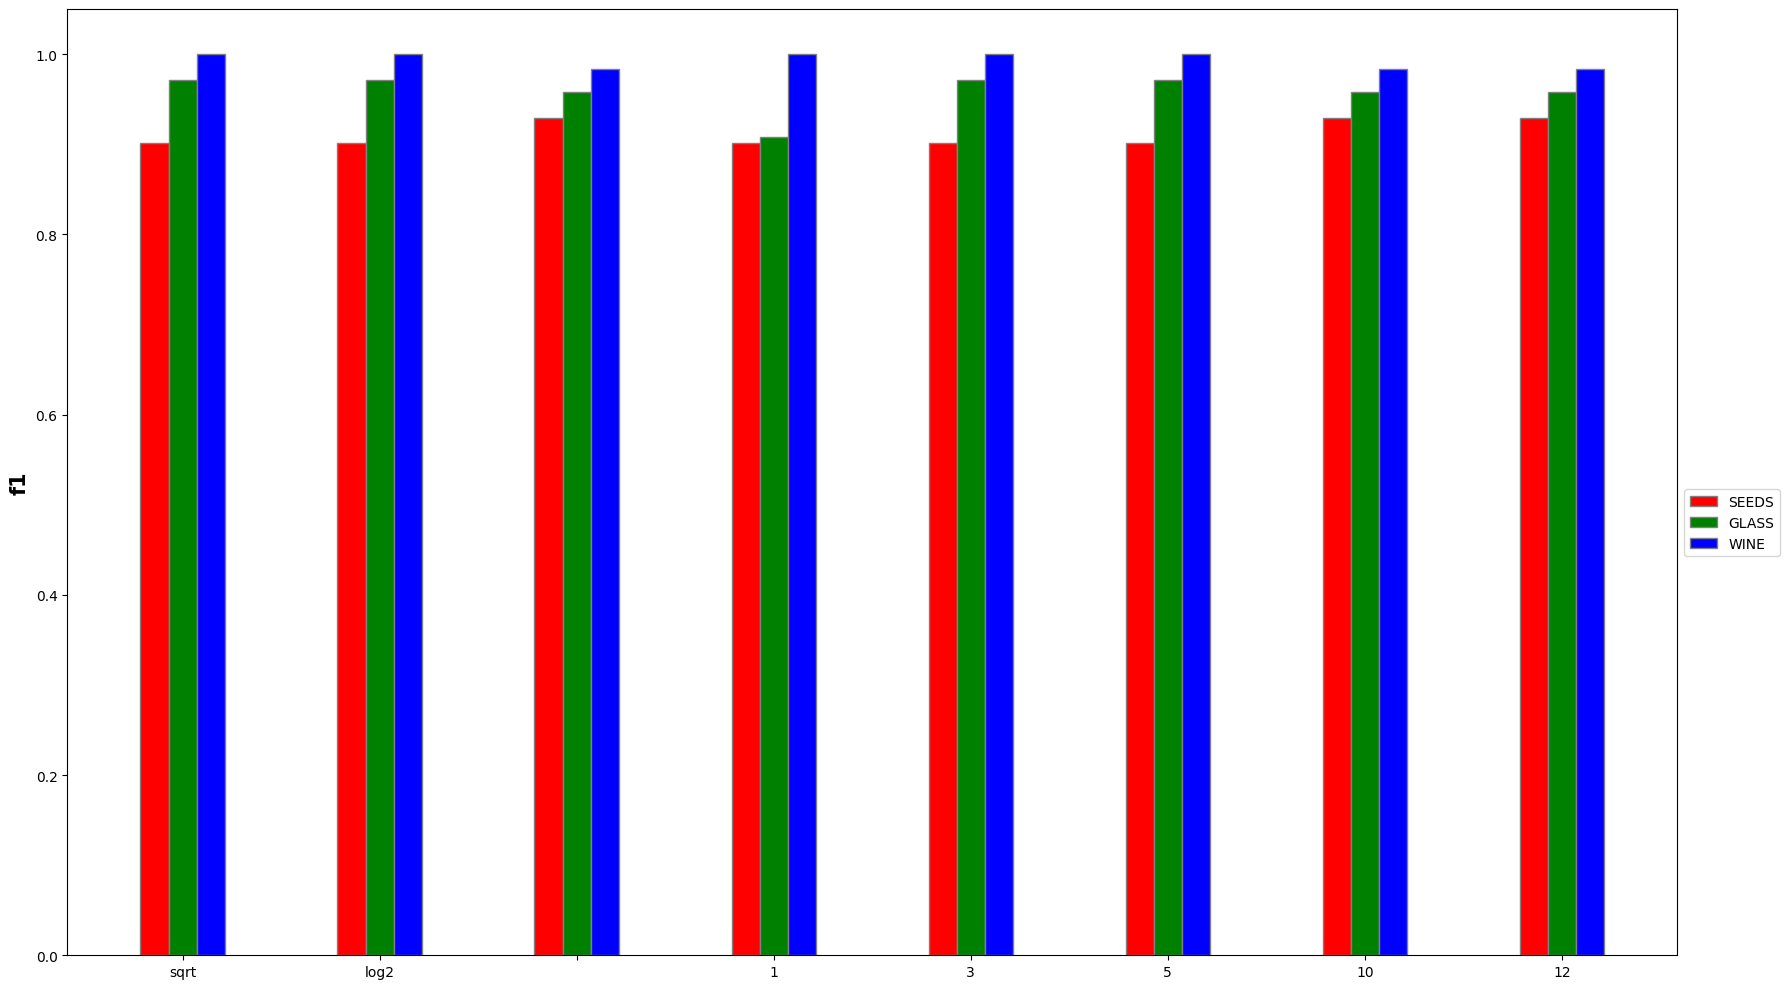

In [55]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

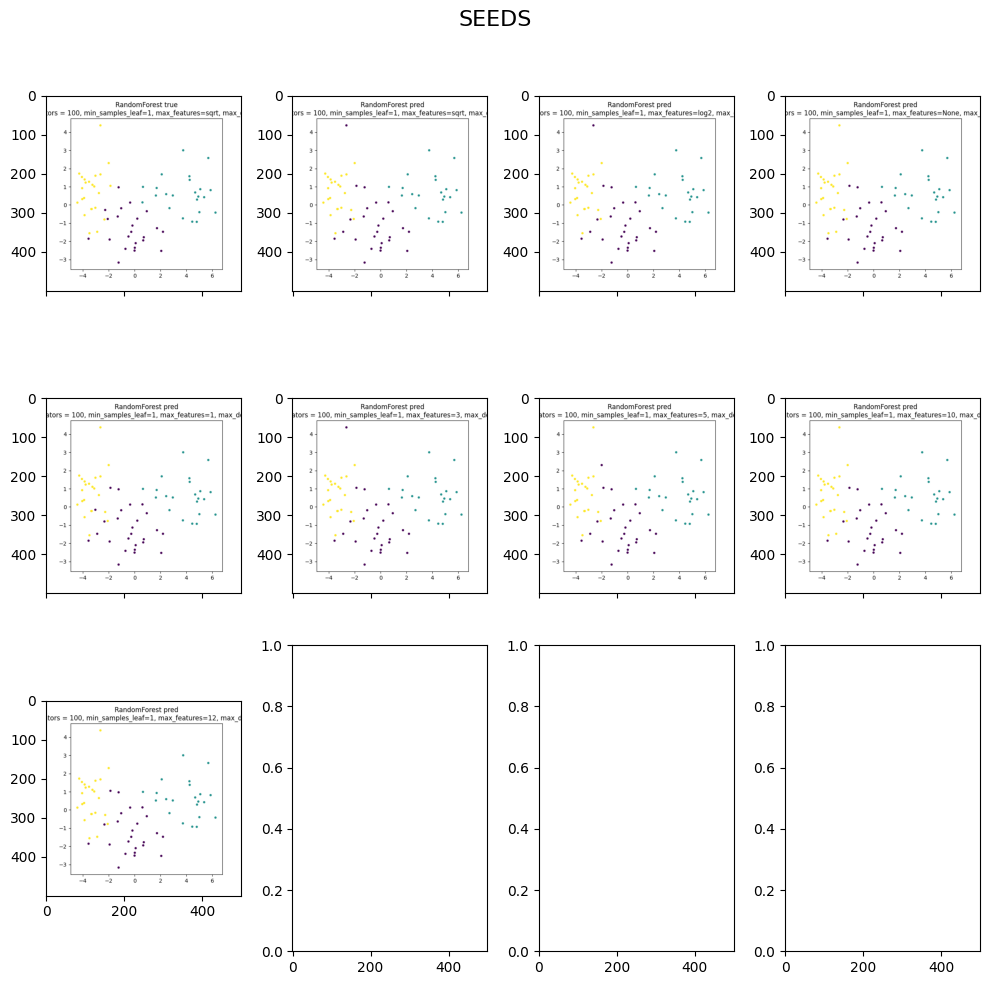

In [56]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

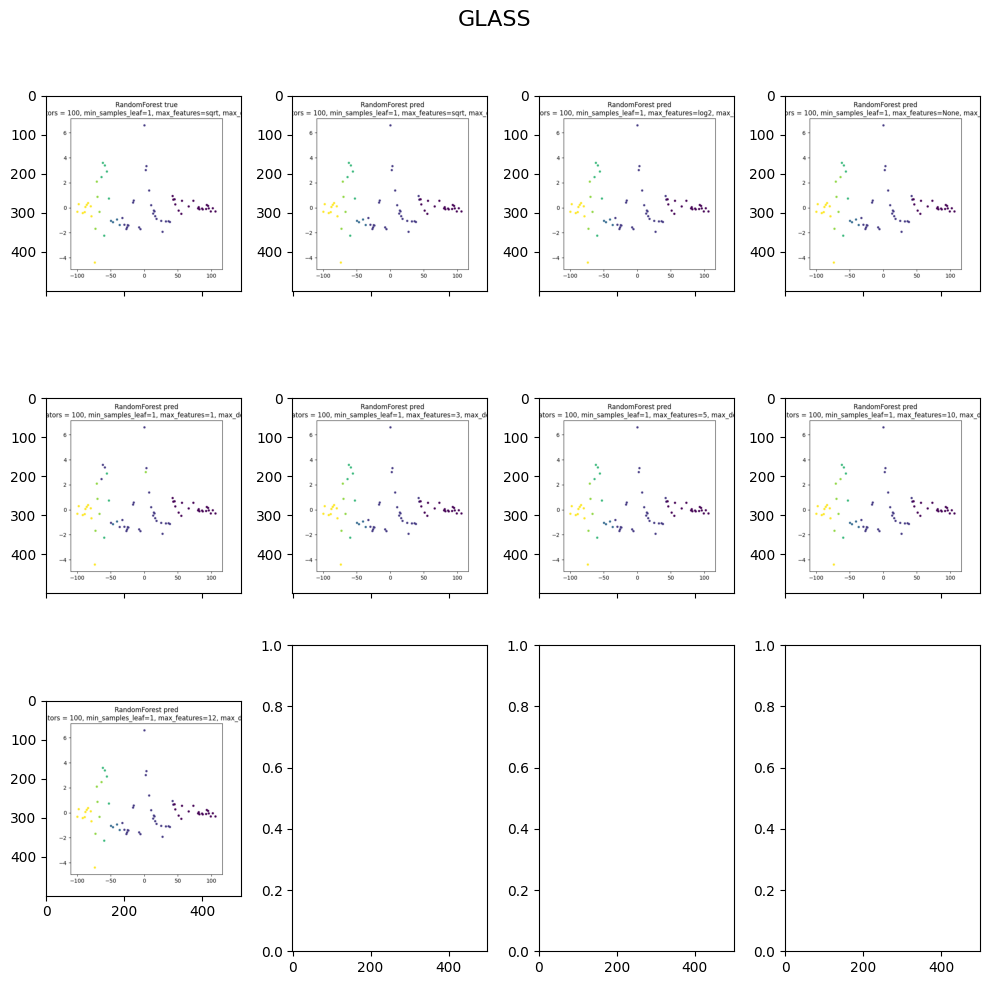

In [57]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

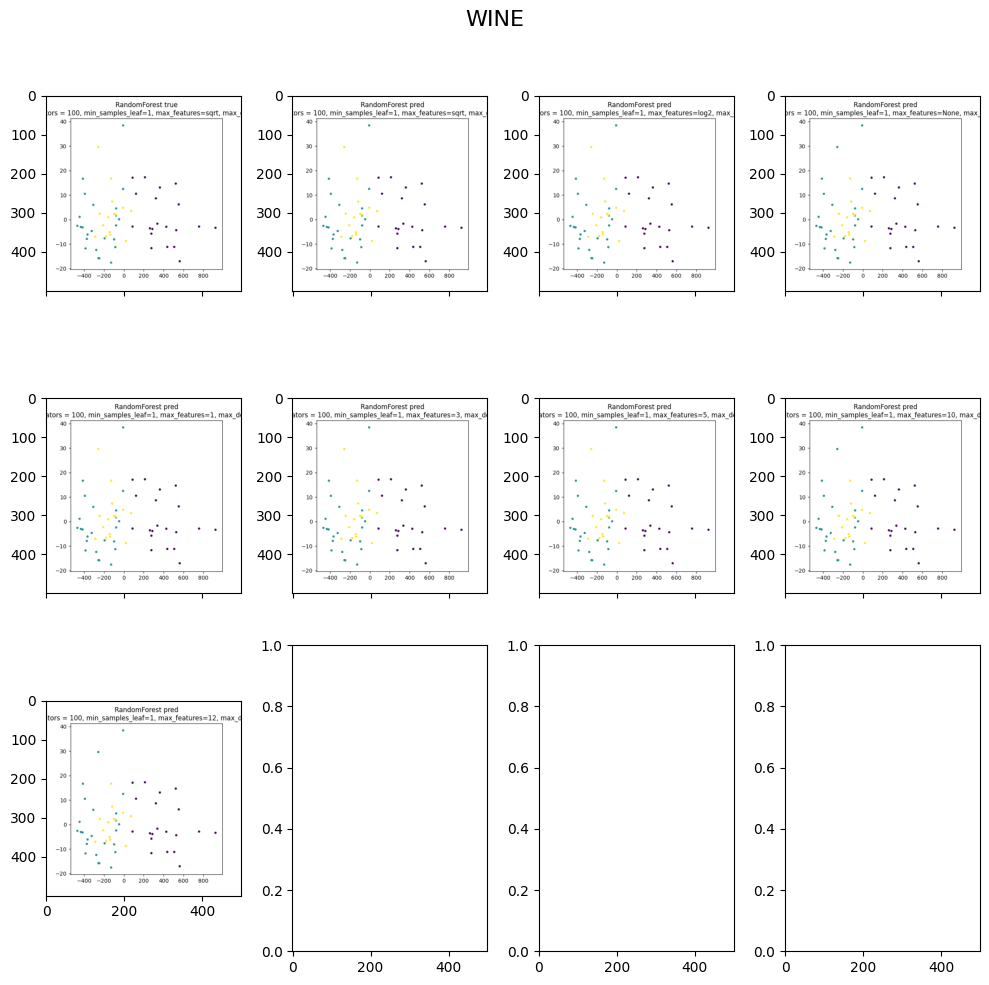

In [58]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

### Random forest - glebokosc

In [59]:

study_vals = [ 1, 5, 10, 15, 20, 40, None]
results_list = [
[run_random_forest (df_seeds, max_depth = c) for c in study_vals],
[run_random_forest (df_glass, max_depth = c) for c in study_vals],
[run_random_forest (df_wine, max_depth = c) for c in study_vals],
]


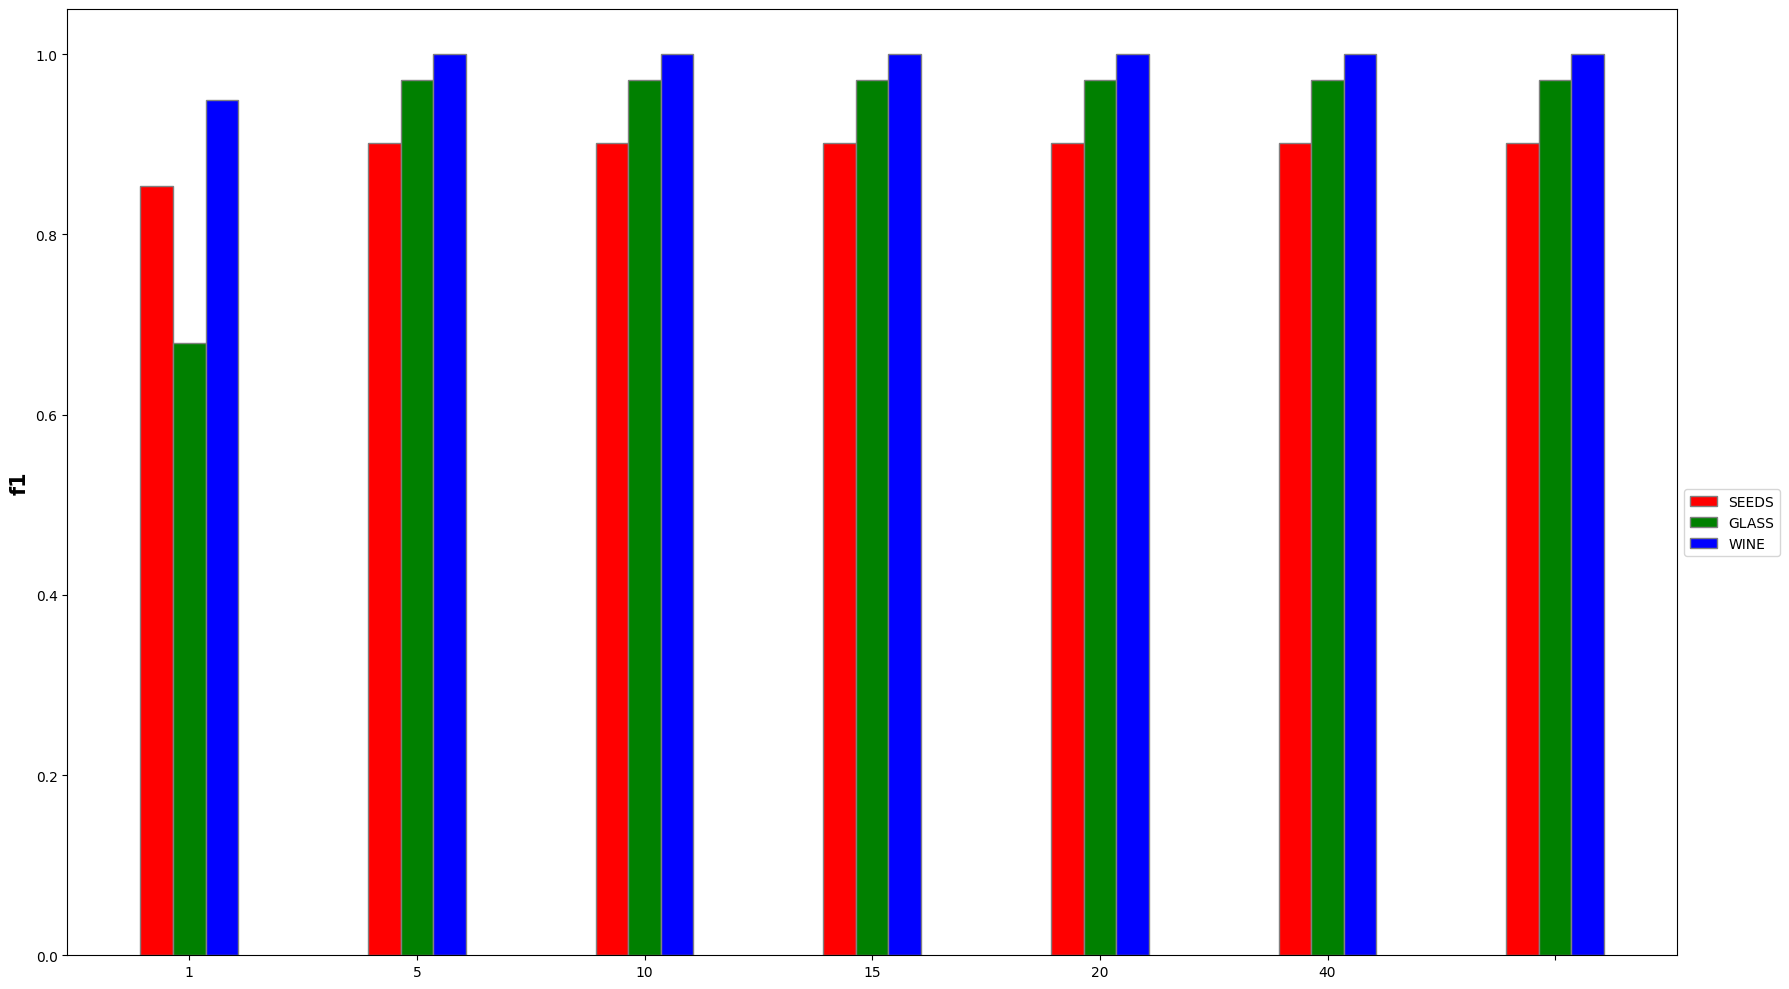

In [60]:
plotStatistics(results_list, metrics_list, study_vals, dataset_list, colour_list)

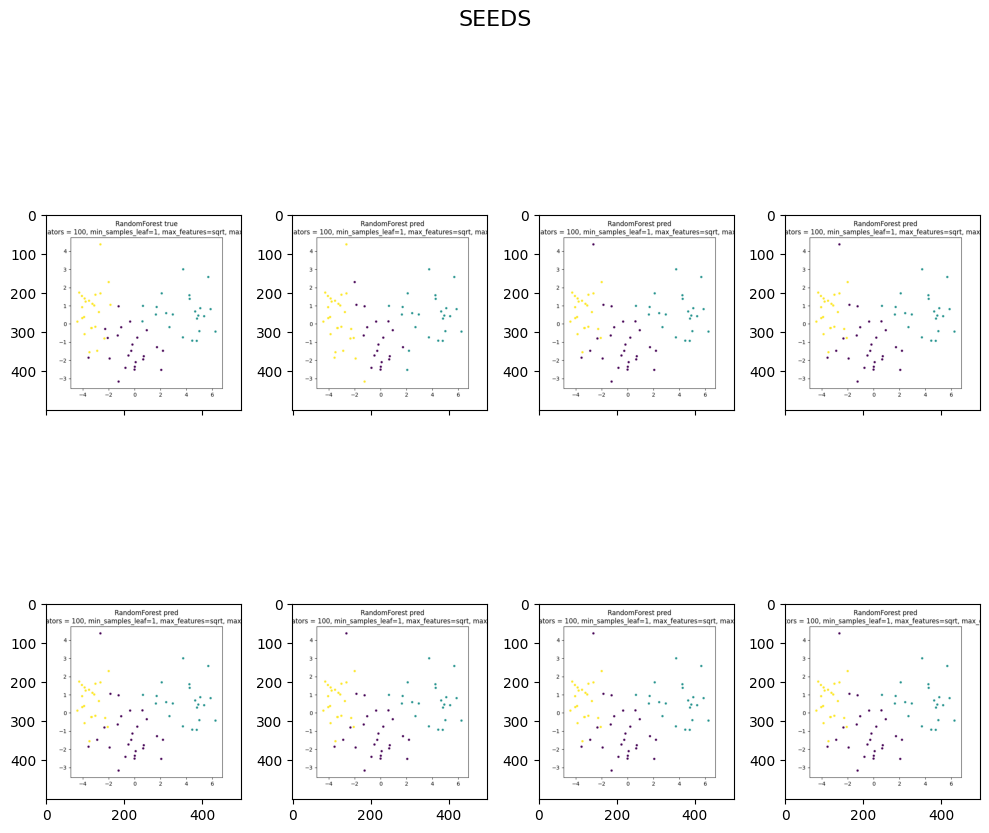

In [61]:
combineFigsInOnePlot(results_list[0], dataset_list[0])

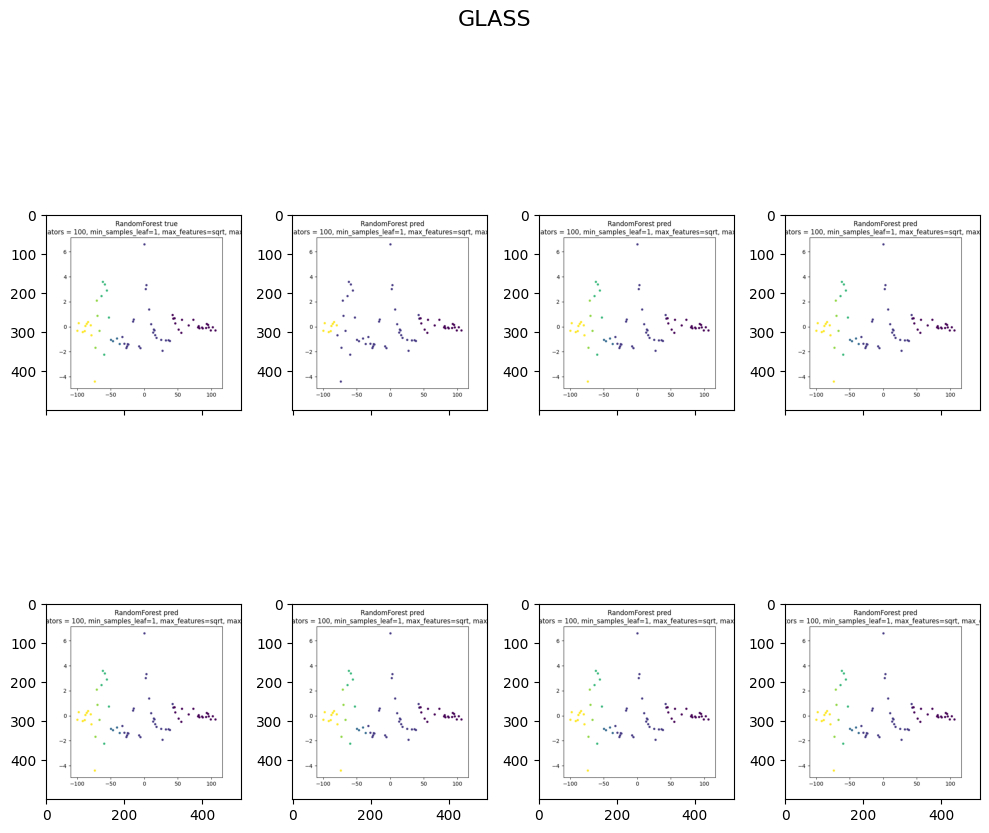

In [62]:
combineFigsInOnePlot(results_list[1], dataset_list[1])

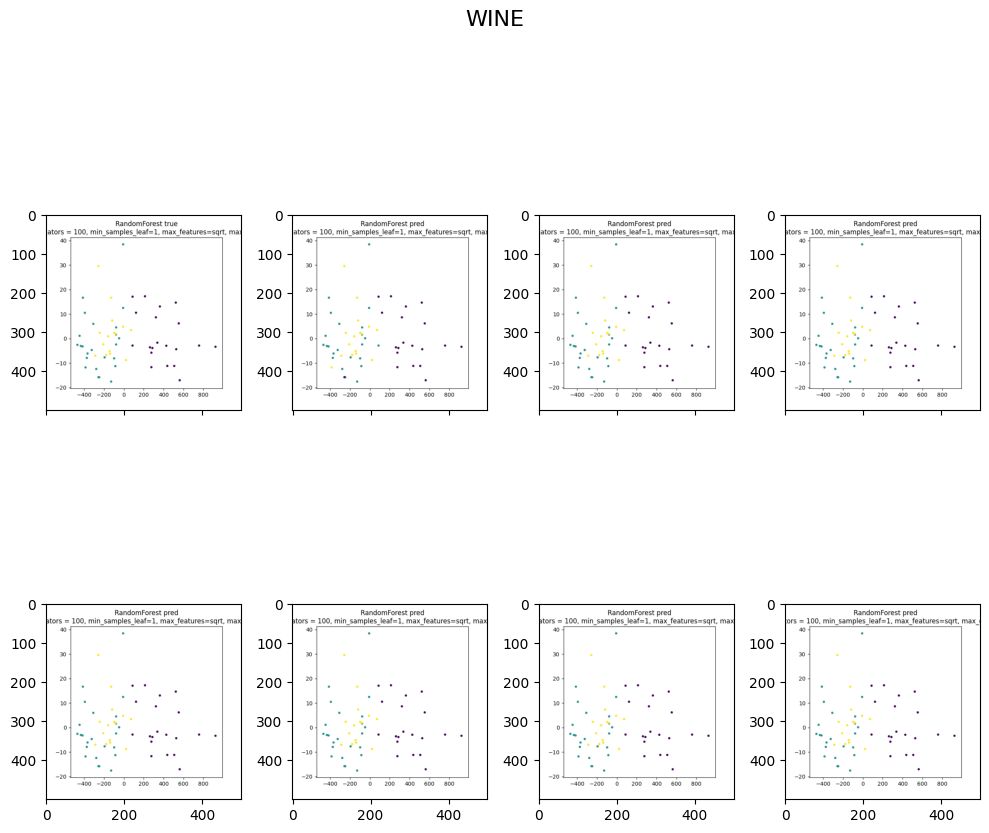

In [63]:
combineFigsInOnePlot(results_list[2], dataset_list[2])

In [64]:
score_metric = 'f1'
results_df = pd.DataFrame([
[RunKNN (df_iris)[score_metric], run_bagging (df_iris)[score_metric], run_adaboost (df_iris)[score_metric], run_random_forest (df_iris)[score_metric]],
[RunKNN (df_seeds)[score_metric], run_bagging (df_seeds)[score_metric], run_adaboost (df_seeds)[score_metric], run_random_forest (df_seeds)[score_metric]],
[RunKNN (df_glass)[score_metric], run_bagging (df_glass)[score_metric], run_adaboost (df_glass)[score_metric], run_random_forest (df_glass)[score_metric]],
[RunKNN (df_wine)[score_metric], run_bagging (df_wine)[score_metric], run_adaboost (df_wine)[score_metric], run_random_forest (df_wine)[score_metric]]
], index=['IRIS', 'SEEDS', 'GLASS', 'WINE'], columns = ['f1 KNN', 'f1 bagging', 'f1 boost', 'f1 forest'])

results_df

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Cross val:  0.9666666666666667
              precision    recall  f1-score   support

           1       0.80      0.87      0.83        23
           2       1.00      0.91      0.95        23
           3       0.88      0.88      0.88        24

    accuracy                           0.89        70
   macro avg       0.89      0.89      0.89        70
weighted avg       0.89      0.89      0.89        70

Cross val:  0.9047619047619048
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        25
           3 

,f1 KNN,f1 bagging,f1 boost,f1 forest
IRIS,0.980000,1.000000,0.878487,0.980000
SEEDS,0.885714,0.887773,0.498168,0.901039
GLASS,0.957746,0.971702,0.702701,0.971702
WINE,0.677966,0.966270,0.895931,1.000000


In [65]:
RunKNN (df_seeds)

              precision    recall  f1-score   support

           1       0.80      0.87      0.83        23
           2       1.00      0.91      0.95        23
           3       0.88      0.88      0.88        24

    accuracy                           0.89        70
   macro avg       0.89      0.89      0.89        70
weighted avg       0.89      0.89      0.89        70

Cross val:  0.9047619047619048


{'f1': 0.8857142857142857, 'cross-val': 0.9047619047619048}

In [66]:
%timeit  run_bagging (df_seeds)

67.9 ms ± 4.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
%timeit  run_adaboost (df_seeds)

68.1 ms ± 12.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
%timeit  run_random_forest (df_seeds)

218 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
